# [Bitcoin Price Prediction - Group ID: 38]

Group Members:

İrem Günal 26815
Deniz Kayserilioğlu 26972
Zehra Lara Tekbaş 26684
Neslihan Özgün 27050


## Introduction

The aim of our project is to predict the price of a cryptocurrency, Bitcoin. There are many features that affect the price fluctuation of Bitcoin. The market open price, highest price reached, the lowest price reached, market closing price and adjusted price of Bitcoin for the day are some features we will look at to observe the correlation between these features and price change, and the correlations within these features that may affect the price change. In addition, Bitcoin’s market cap, supply, and change in volume of transactions in USD over time are some of them that we believe affect the price of Bitcoin. Moreover, we analyse the impact of Ethereum's open, close, high, low prices, marketcap and volume. In this project, we will focus on these many features and try to understand how they are correlated with Bitcoin’s pricing. Also, we will try to measure to what extent these features affect the price of Bitcoin.  Later on, we believe that understanding the correlation between these features will help us predict Bitcoin’s price.

### The Dataset

The datasets we use for this project is the datasets of Cryptocurrency Historical Prices from Kaggle. Spesifically, the Bitcoin Historical Prices and Ethereum Historical Prices dataset. The reason we looked at two different dataset is to analyise both the features within Bitcoin such as the opening and closing price etc. and the impact of Ethereum on Bitcoin.

The datasets can be reached from the link below:

https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv
https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Ethereum.csv



## Exploratory Data Analysis

### Visualizations Descriptive Statistics

In [159]:
!pip install reverse_geocoder
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [160]:
#import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder as rg
from geopy.distance import geodesic
from scipy import stats
import seaborn as sns
from os.path import join
from os import listdir
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:,.2f}".format

In [161]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
df=pd.read_csv("/content/drive/MyDrive/coin_Bitcoin.csv")
df_2=pd.read_csv("/content/drive/MyDrive/coin_Ethereum.csv")

In [163]:
nan_cols = [i for i in df.columns if df[i].isnull().any()]
nan_cols

[]

In [164]:
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.49,134.00,134.44,144.54,0.00,"1,603,768,864.50"
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.93,134.05,144.00,139.00,0.00,"1,542,813,125.00"
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.89,107.72,139.00,116.99,0.00,"1,298,954,593.75"
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.60,92.28,116.38,105.21,0.00,"1,168,517,495.25"
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.13,79.10,106.25,97.75,0.00,"1,085,995,168.75"
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,"33,939.59","32,770.68","33,549.60","33,897.05","38,728,974,942.25","635,450,784,106.09"
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,"34,909.26","33,402.70","33,854.42","34,668.55","24,383,958,643.26","649,939,701,346.23"
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,"35,937.57","34,396.48","34,665.56","35,287.78","24,924,307,911.11","661,574,836,314.86"
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,"35,284.34","33,213.66","35,284.34","33,746.00","26,721,554,282.07","632,696,207,199.70"


In [165]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,"2,991.00","2,991.00","2,991.00","2,991.00","2,991.00","2,991.00","2,991.00"
mean,"1,496.00","6,893.33","6,486.01","6,700.15","6,711.29","10,906,334,004.87","120,876,059,112.88"
std,863.57,"11,642.83","10,869.03","11,288.04","11,298.14","18,888,952,979.84","210,943,836,987.40"
min,1.00,74.56,65.53,68.50,68.43,0.00,"778,411,178.88"
25%,748.50,436.18,422.88,430.45,430.57,"30,367,250.00","6,305,579,328.82"
50%,"1,496.00","2,387.61","2,178.50","2,269.89","2,286.41","946,035,968.00","37,415,031,060.80"
75%,"2,243.50","8,733.93","8,289.80","8,569.66","8,576.24","15,920,149,610.47","149,995,739,945.59"
max,"2,991.00","64,863.10","62,208.96","63,523.75","63,503.46","350,967,941,479.06","1,186,364,044,140.27"


In [166]:
df.shape

(2991, 10)

In [167]:
df.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [168]:
temp=0
for i in df.columns:
    print(i,temp)
    temp += 1

SNo 0
Name 1
Symbol 2
Date 3
High 4
Low 5
Open 6
Close 7
Volume 8
Marketcap 9


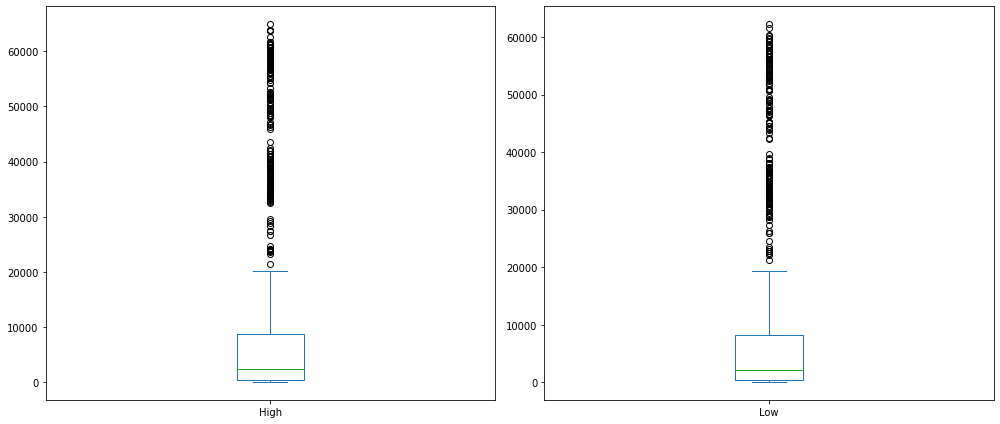

In [169]:
# distribution plots
fig, ax = plt.subplots(1, 2, figsize=(14,6))
df["High"].plot(kind="box", ax=ax[0])
df["Low"].plot(kind="box", ax=ax[1])

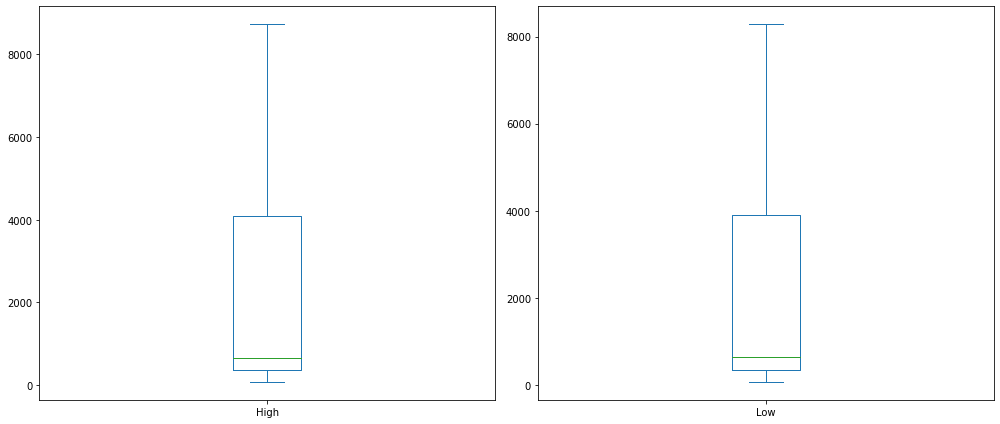

In [170]:
k = df["High"].quantile(q=0.75)
m = df["Low"].quantile(q=0.75)
s = df[df['High'] < k]
t = df[df['Low'] < m]
fig, ax = plt.subplots(1, 2, figsize=(14,6))
s["High"].plot(kind="box", ax=ax[0])
t["Low"].plot(kind="box", ax=ax[1])

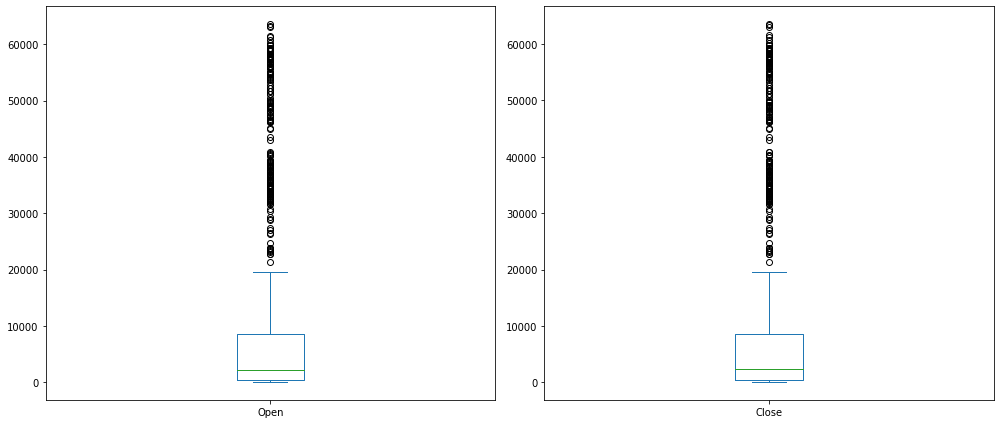

In [171]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
df["Open"].plot(kind="box", ax=ax[0])
df["Close"].plot(kind="box", ax=ax[1])

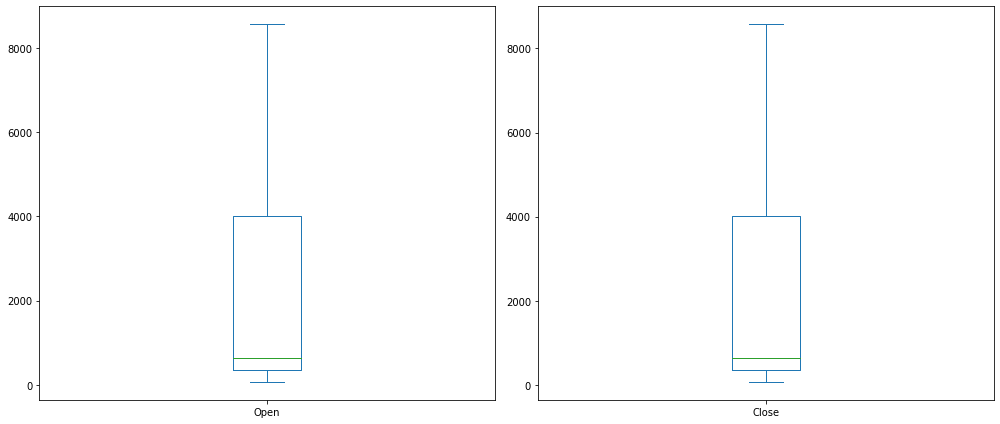

In [172]:
a = df["Open"].quantile(q=0.75)
b = df["Close"].quantile(q=0.75)
c = df[df['Open'] < a]
d = df[df['Close'] < b]
fig, ax = plt.subplots(1, 2, figsize=(14,6))
c["Open"].plot(kind="box", ax=ax[0])
d["Close"].plot(kind="box", ax=ax[1])

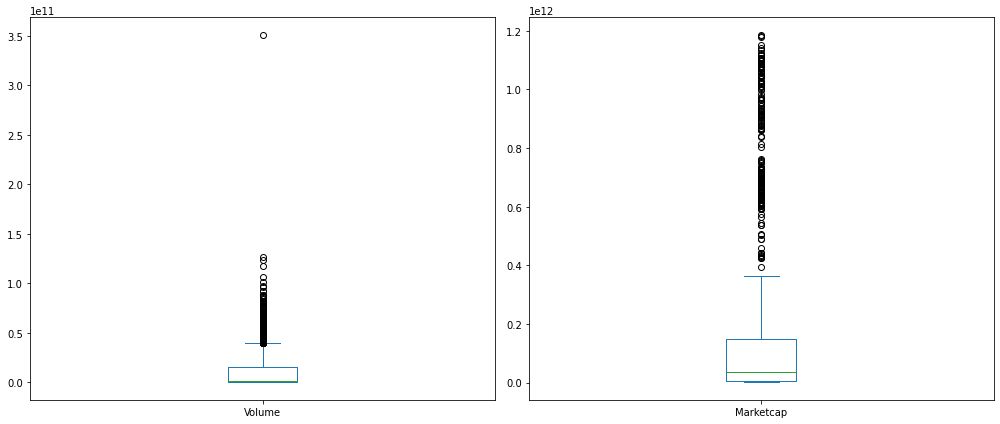

In [173]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
df["Volume"].plot(kind="box", ax=ax[0])
df["Marketcap"].plot(kind="box", ax=ax[1])

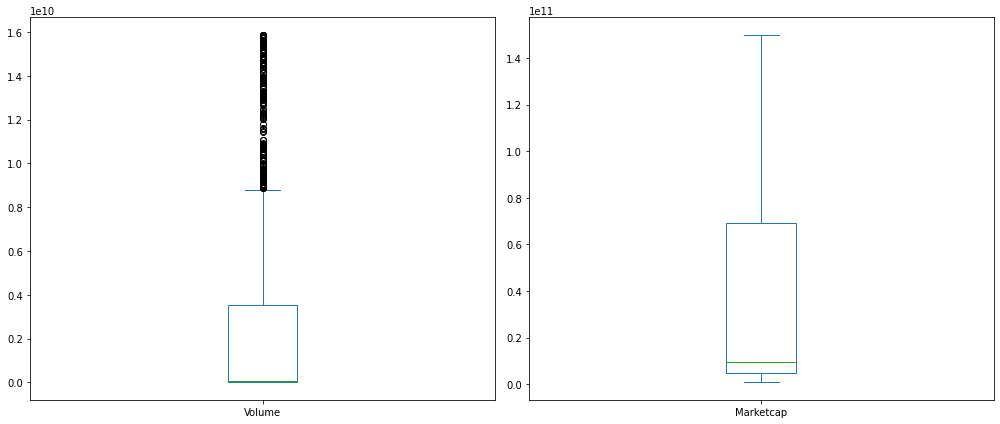

In [174]:
f = df["Volume"].quantile(q=0.75)
g = df["Marketcap"].quantile(q=0.75)
h = df[df['Volume'] < f]
i = df[df['Marketcap'] < g]
fig, ax = plt.subplots(1, 2, figsize=(14,6))
h["Volume"].plot(kind="box", ax=ax[0])
i["Marketcap"].plot(kind="box", ax=ax[1])

We used boxplot in order to find the outliers in the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d82671d50>,
      dtype=object)

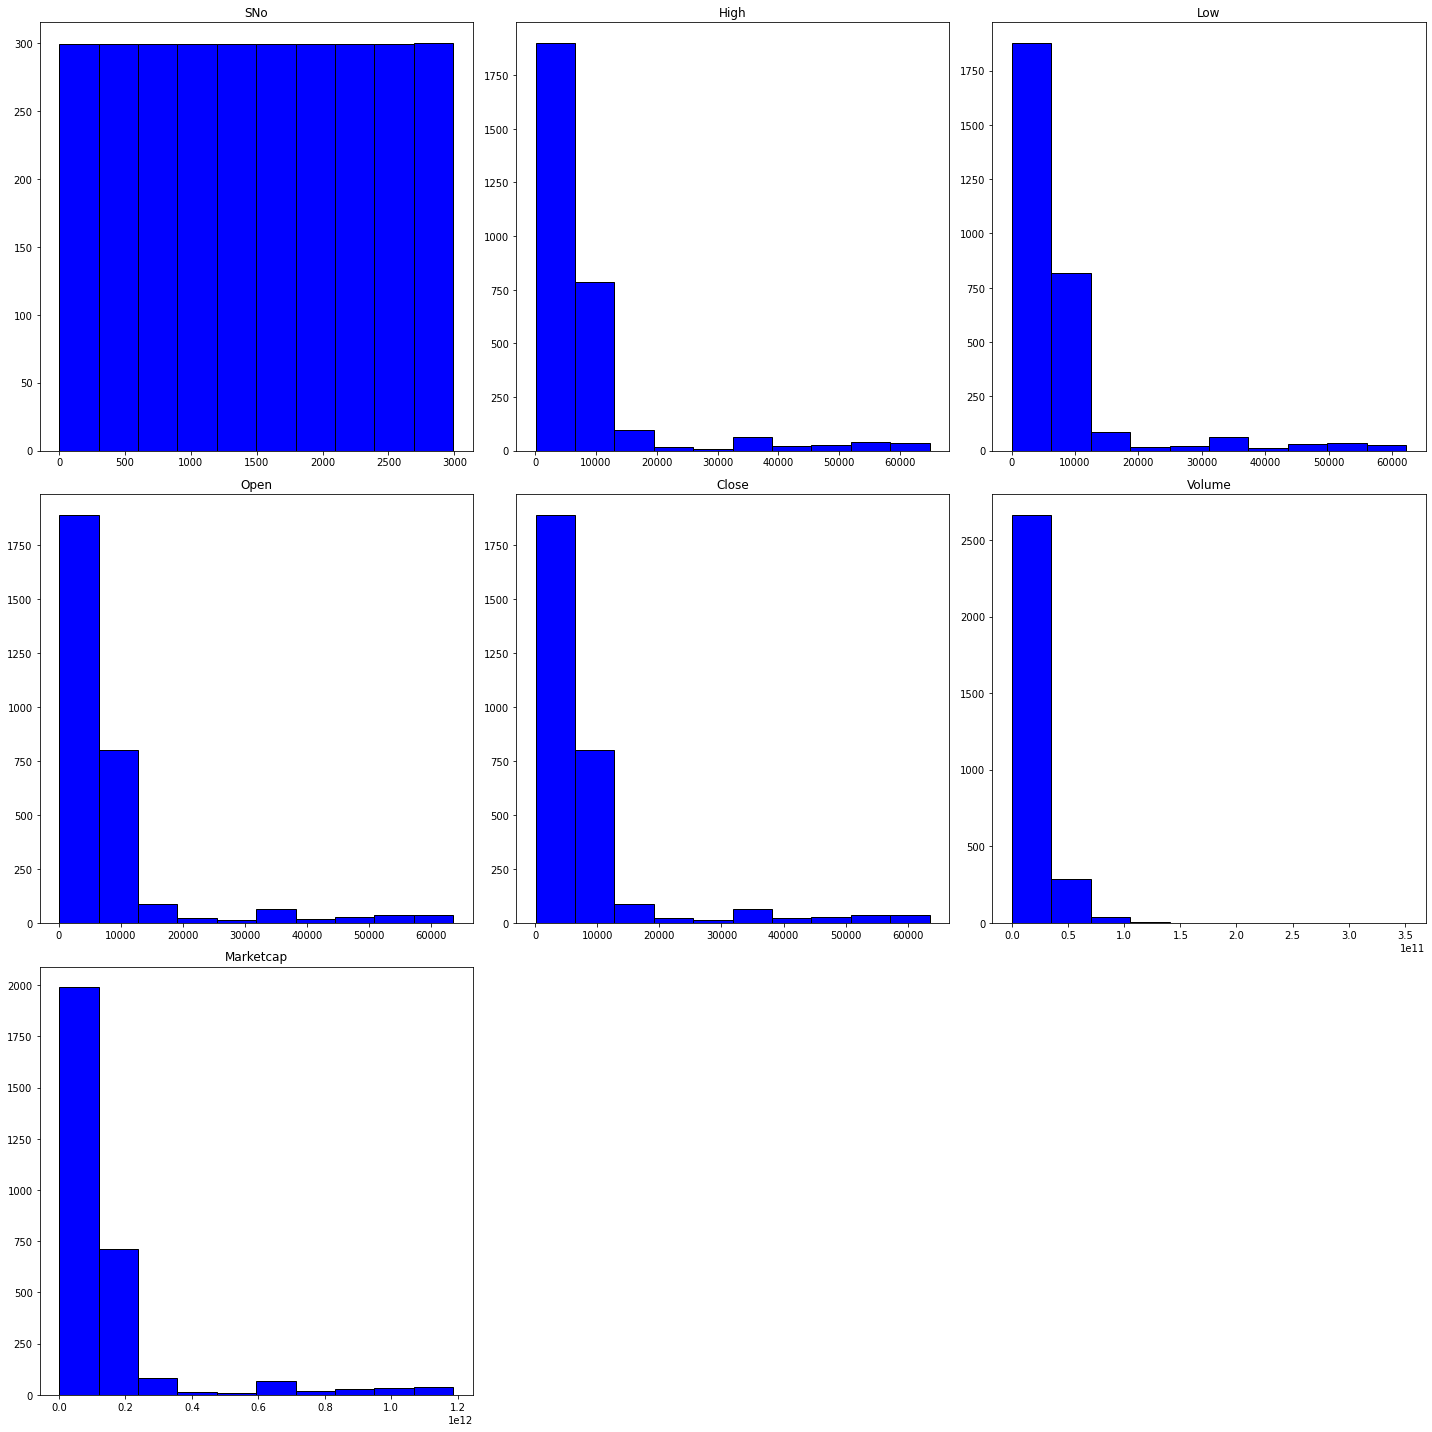

In [175]:
df.hist(figsize=(20, 20),color='blue', edgecolor='black', grid=False)

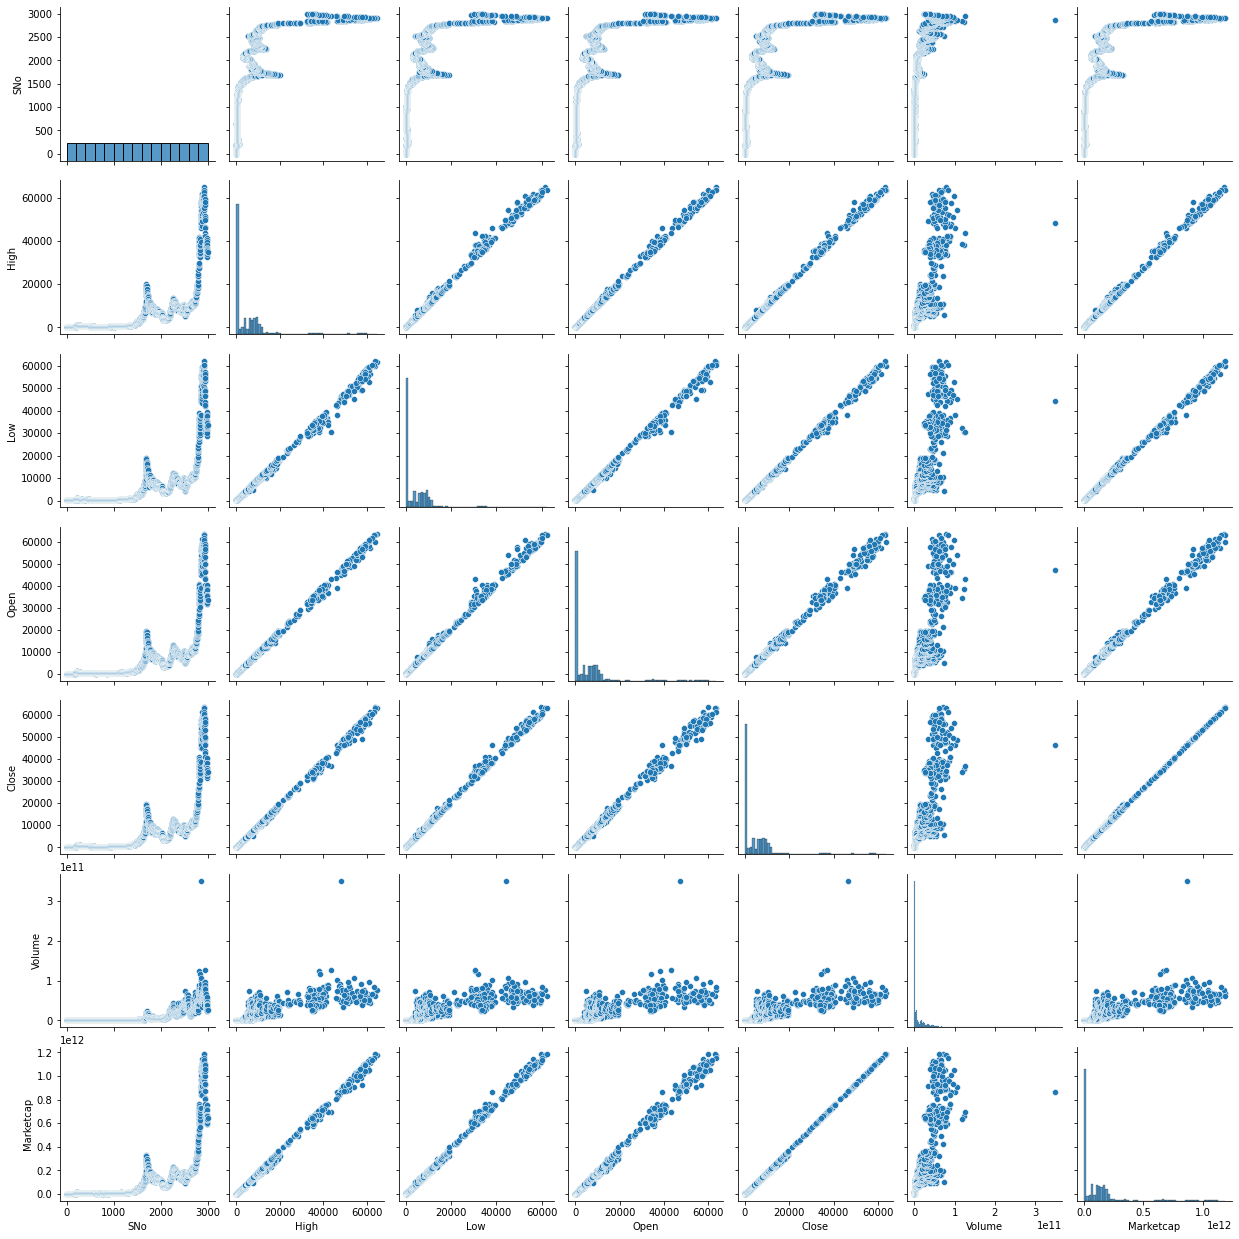

In [176]:
#pairs plot
sns.pairplot(df)

### Analysis of Market Open and Closing Price

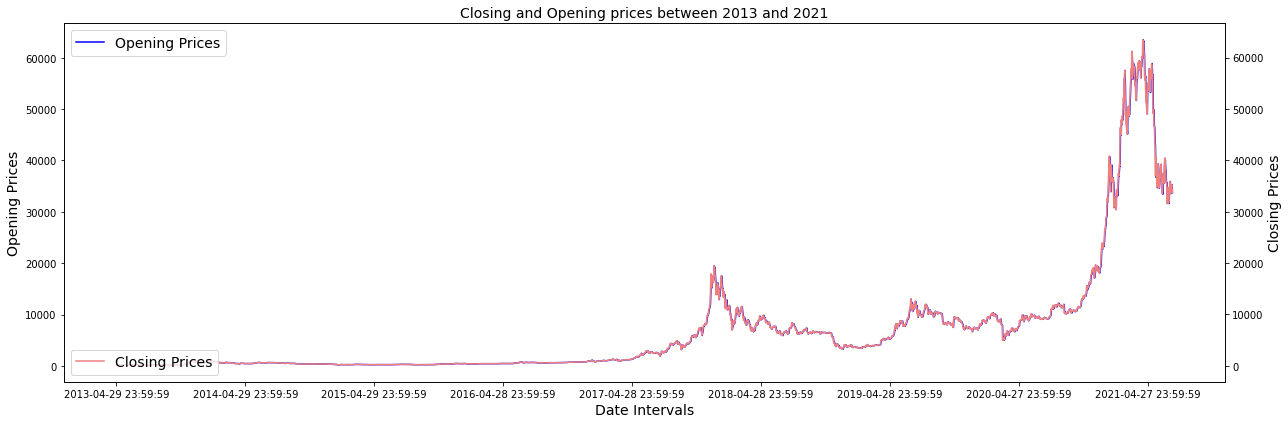

In [177]:
#time series
date = df['Date']
y1 = df['Open']
y2 = df['Close']

plt.rcParams["figure.figsize"] = [18, 6]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, y1, label ='Opening Prices', color='blue')
ax2.plot(date, y2, label='Closing Prices',color='lightcoral')

date_intervals = df['Date'][::365]
plt.xticks(date_intervals, rotation=90)

ax1.set_xlabel("Date Intervals",size=14)
ax1.set_ylabel("Opening Prices",size=14)
ax2.set_ylabel("Closing Prices",size=14)

plt.title('Closing and Opening prices between 2013 and 2021', size=14)
ax1.legend(loc="upper left", fontsize=14)
ax2.legend(loc="lower left", fontsize=14)

plt.plot()
plt.show()

We generate a line graph to see both the Open and Close prices of bitcoin and from the line graph we can observe that Open and Close prices are in line between 2013 and 2021 without any significant difference.

In [178]:
start_date = '2018-01-01'
end_date   = '2021-07-06'
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
df_recent = df.loc[mask]
df_recent

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
1708,1709,Bitcoin,BTC,2018-01-01 23:59:59,"14,112.20","13,154.70","14,112.20","13,657.20","10,291,200,000.00","229,119,155,396.00"
1709,1710,Bitcoin,BTC,2018-01-02 23:59:59,"15,444.60","13,163.60","13,625.00","14,982.10","16,846,600,192.00","251,377,913,955.00"
1710,1711,Bitcoin,BTC,2018-01-03 23:59:59,"15,572.80","14,844.50","14,978.20","15,201.00","16,871,900,160.00","255,080,562,912.00"
1711,1712,Bitcoin,BTC,2018-01-04 23:59:59,"15,739.70","14,522.20","15,270.70","15,599.20","21,783,199,744.00","261,795,321,110.00"
1712,1713,Bitcoin,BTC,2018-01-05 23:59:59,"17,705.20","15,202.80","15,477.20","17,429.50","23,840,899,072.00","292,544,135,538.00"
...,...,...,...,...,...,...,...,...,...,...
2985,2986,Bitcoin,BTC,2021-07-01 23:59:59,"35,035.98","32,883.78","35,035.98","33,572.12","37,838,957,079.15","629,339,325,297.74"
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,"33,939.59","32,770.68","33,549.60","33,897.05","38,728,974,942.25","635,450,784,106.09"
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,"34,909.26","33,402.70","33,854.42","34,668.55","24,383,958,643.26","649,939,701,346.23"
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,"35,937.57","34,396.48","34,665.56","35,287.78","24,924,307,911.11","661,574,836,314.86"


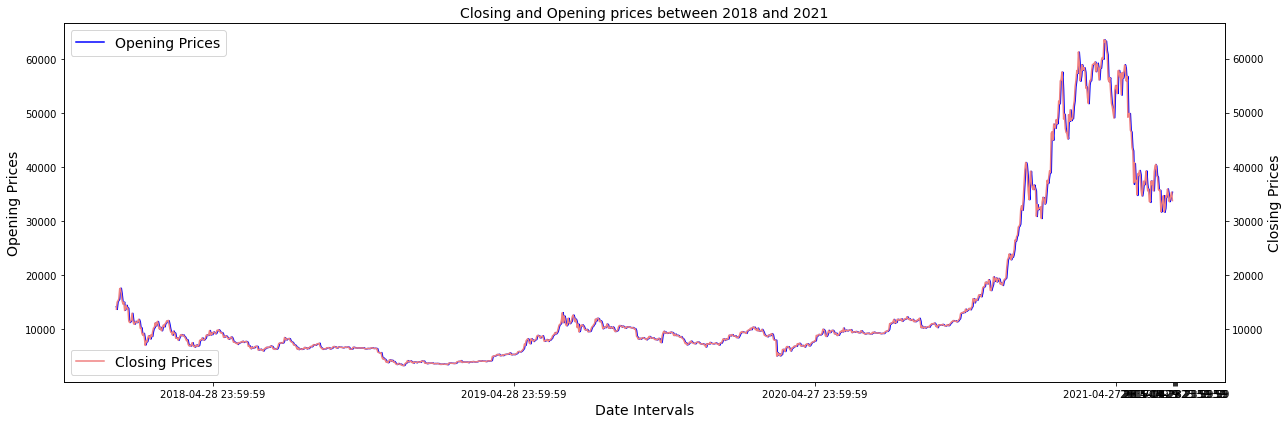

In [179]:
date = df_recent['Date']
y1 = df_recent['Open']
y2 = df_recent['Close']

plt.rcParams["figure.figsize"] = [18, 6]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, y1, label ='Opening Prices', color='blue')
ax2.plot(date, y2, label='Closing Prices',color='lightcoral')

date_intervals = df['Date'][::365]
plt.xticks(date_intervals, rotation=90)

ax1.set_xlabel("Date Intervals",size=14)
ax1.set_ylabel("Opening Prices",size=14)
ax2.set_ylabel("Closing Prices",size=14)

plt.title('Closing and Opening prices between 2018 and 2021', size=14)
ax1.legend(loc="upper left", fontsize=14)
ax2.legend(loc="lower left", fontsize=14)

plt.plot()
plt.show()

We can see that as the years increase, open and closing price has also increased. First, until 2018, there is no clear increment. But later, after 2018 we can see that the open and closing price of Bitcoin (BTC) has started to fluctuate and peaked around the beginning of 2021. The opening and closing prices show similar trends as expected.

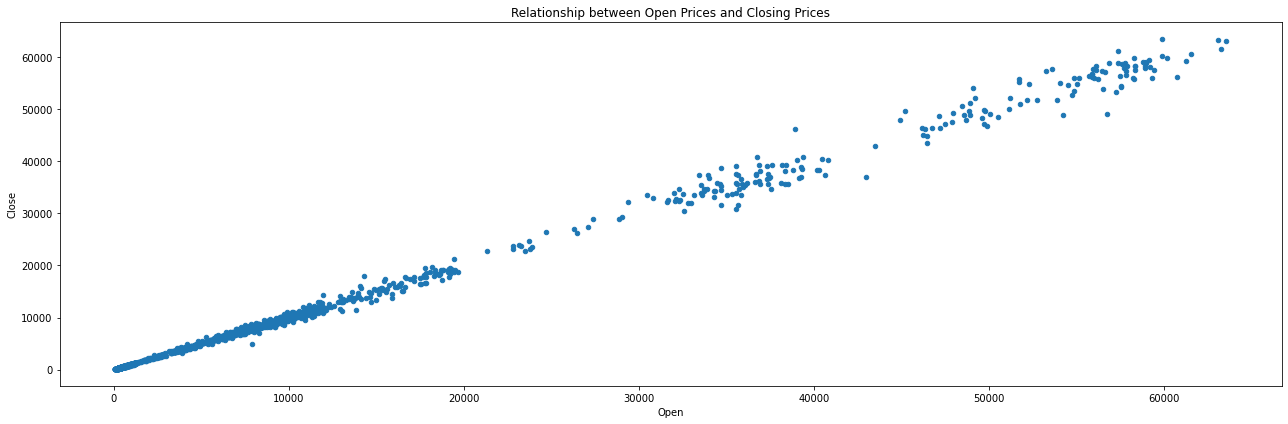

In [180]:
#scatter plot
df['Open'] = df['Open'].astype('float')
df['Close'] = df['Close'].astype('float')

ax = df[['Open', 'Close']].plot.scatter(x='Open', y='Close', s=20)

plt.title("Relationship between Open Prices and Closing Prices")


plt.show()

We see that open prices and closing prices has positive correlation between them. Also they have almost perfect correlation because the scatter plot data is formed almost as a linear line.

### Analysis of the Highest Price and the Lowest Price Reached

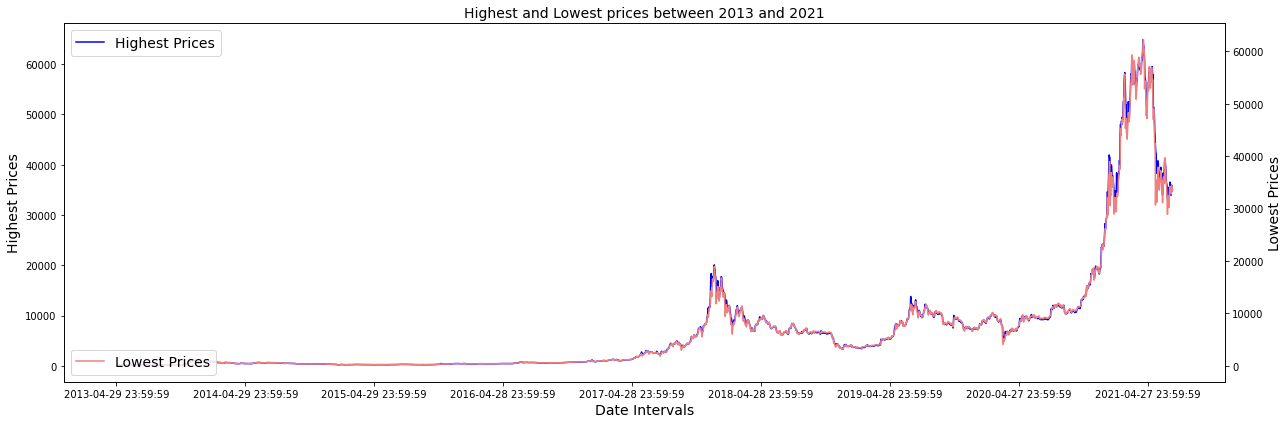

In [181]:
#time series
date = df['Date']
y1 = df['High']
y2 = df['Low']

plt.rcParams["figure.figsize"] = [18, 6]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, y1, label ='Highest Prices', color='blue')
ax2.plot(date, y2, label='Lowest Prices',color='lightcoral')

date_intervals = df['Date'][::365]
plt.xticks(date_intervals, rotation=90)

ax1.set_xlabel("Date Intervals",size=14)
ax1.set_ylabel("Highest Prices",size=14)
ax2.set_ylabel("Lowest Prices",size=14)

plt.title('Highest and Lowest prices between 2013 and 2021', size=14)
ax1.legend(loc="upper left", fontsize=14)
ax2.legend(loc="lower left", fontsize=14)

plt.plot()
plt.show()

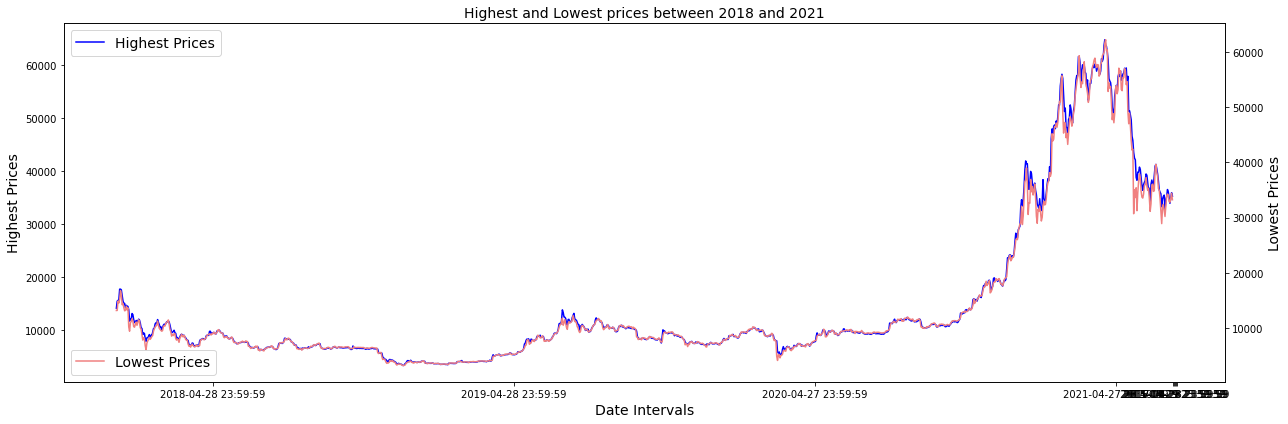

In [182]:
date = df_recent['Date']
y1 = df_recent['High']
y2 = df_recent['Low']

plt.rcParams["figure.figsize"] = [18, 6]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, y1, label ='Highest Prices', color='blue')
ax2.plot(date, y2, label='Lowest Prices',color='lightcoral')

date_intervals = df['Date'][::365]
plt.xticks(date_intervals, rotation=90)

ax1.set_xlabel("Date Intervals",size=14)
ax1.set_ylabel("Highest Prices",size=14)
ax2.set_ylabel("Lowest Prices",size=14)

plt.title('Highest and Lowest prices between 2018 and 2021', size=14)
ax1.legend(loc="upper left", fontsize=14)
ax2.legend(loc="lower left", fontsize=14)

plt.plot()
plt.show()

We can see that as the years increase, highest and lowest reached daily has also increased. First, until 2018, there is no clear increment. But later, after 2018 we can see that the high and lowest price of Bitcoin (BTC) reached has started to fluctuate and peaked around the beginning of 2021. The highest and the lowest price reached shows a similar trend as the opening and closing prices.

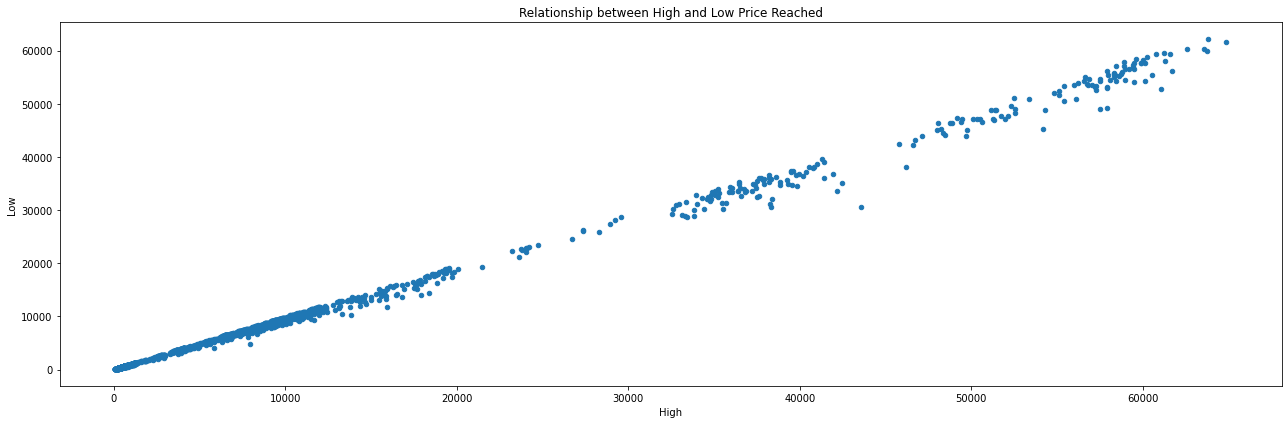

In [183]:
#scatter plot
df['High'] = df['High'].astype('float')
df['Low'] = df['Low'].astype('float')

ax = df[['High', 'Low']].plot.scatter(x='High', y='Low', s=20)

plt.title("Relationship between High and Low Price Reached")


plt.show()

From the scatter plot we can make a statement about the correlation between high and low price reached and that is they have a positive correlation and even almost a perfect one because in the scatter plot the line is linear.

### Analysis of Highest Price and the Closing Price Reached

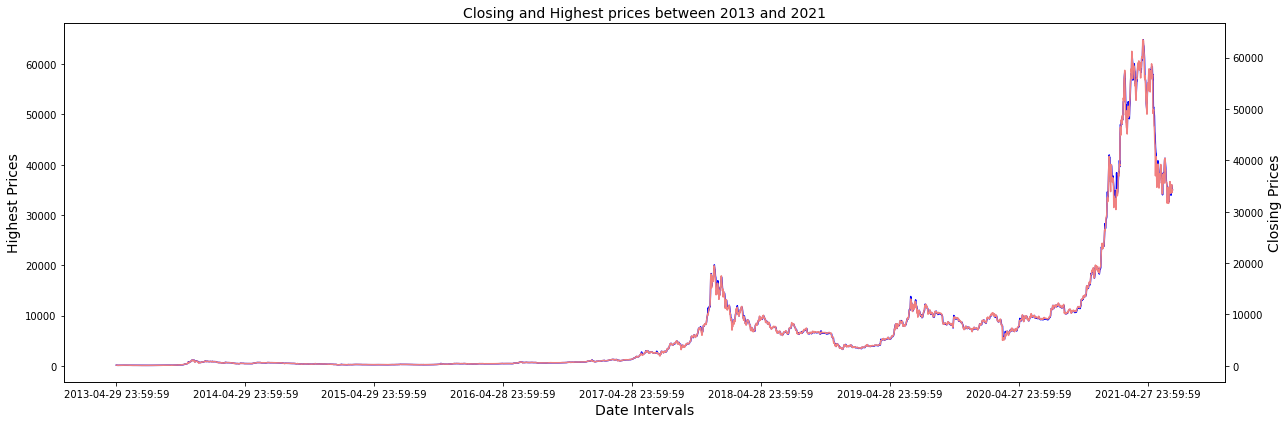

In [184]:
date = df['Date']
y1 = df['High']
y2 = df['Close']

plt.rcParams["figure.figsize"] = [18, 6]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, y1, label ='Highest Prices', color='blue')
ax2.plot(date, y2, label='Closing Prices',color='lightcoral')

date_intervals = df['Date'][::365]
plt.xticks(date_intervals, rotation=90)

ax1.set_xlabel("Date Intervals",size=14)
ax1.set_ylabel("Highest Prices",size=14)
ax2.set_ylabel("Closing Prices",size=14)

plt.title('Closing and Highest prices between 2013 and 2021', size=14)

plt.plot()
plt.show()

We can see that as the years increase, closing and highest prices reached daily has also increased in the big picture. First, until 2018, there is no clear increment. But later, between 2017 and 2018 there is an upward peak and it continues with a sudden decrease. After 2018 the closing and highest prices has an upward trend until 2021. 

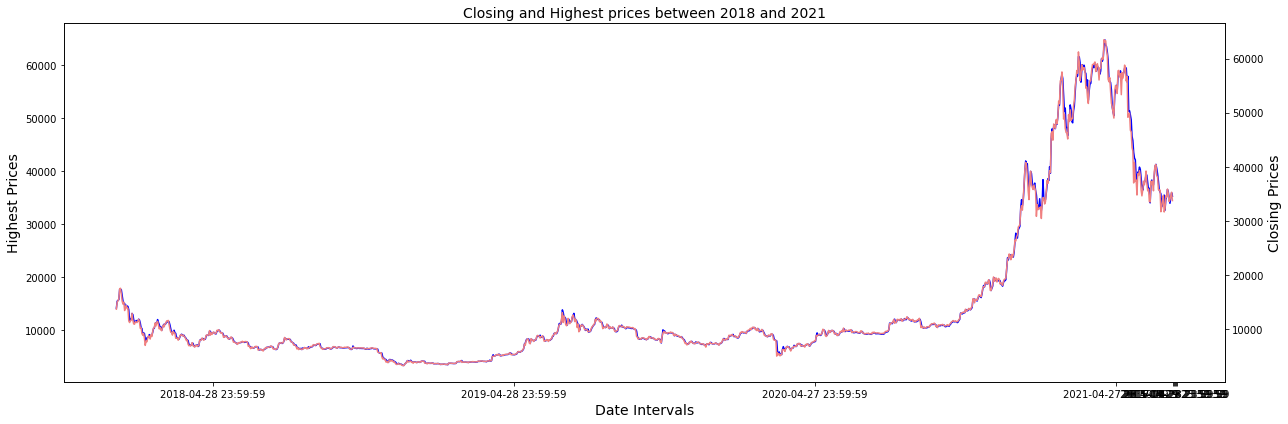

In [185]:
date = df_recent['Date']
y1 = df_recent['High']
y2 = df_recent['Close']

plt.rcParams["figure.figsize"] = [18, 6]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, y1, label ='Highest Prices', color='blue')
ax2.plot(date, y2, label='Closing Prices',color='lightcoral')

date_intervals = df['Date'][::365]
plt.xticks(date_intervals, rotation=90)

ax1.set_xlabel("Date Intervals",size=14)
ax1.set_ylabel("Highest Prices",size=14)
ax2.set_ylabel("Closing Prices",size=14)

plt.title('Closing and Highest prices between 2018 and 2021', size=14)

plt.plot()
plt.show()

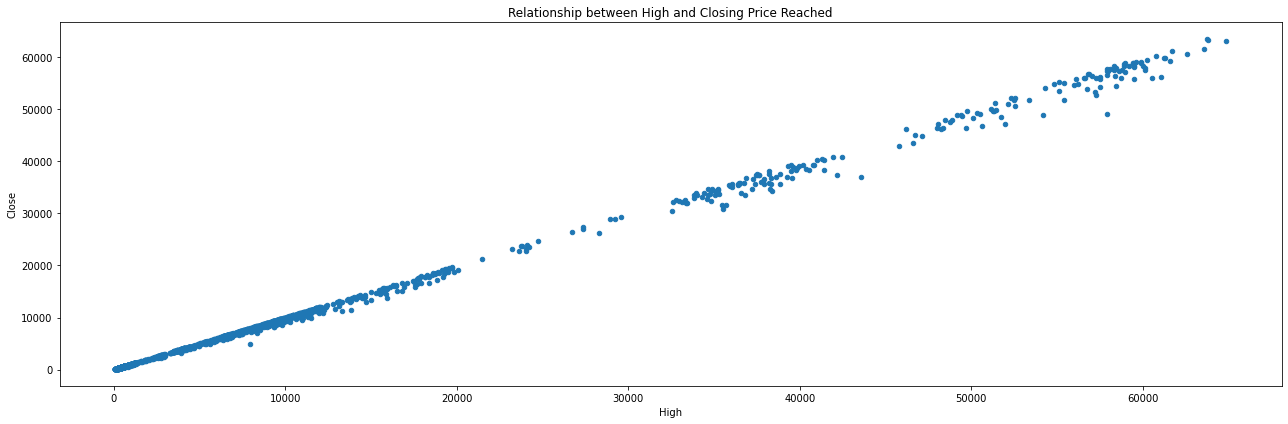

In [186]:
#scatter plot
df['High'] = df['High'].astype('float')
df['Close'] = df['Close'].astype('float')

ax = df[['High', 'Close']].plot.scatter(x='High', y='Close', s=20)

plt.title("Relationship between High and Closing Price Reached")


plt.show()

Here, we can see that the highest price and the closing price of Bitcoin is positively correlated. This was something expected to see since the change in price can be seen both from the highest price and from the closing price.

### Analysis of Market Cap and Change in Volume of Transactions in USD

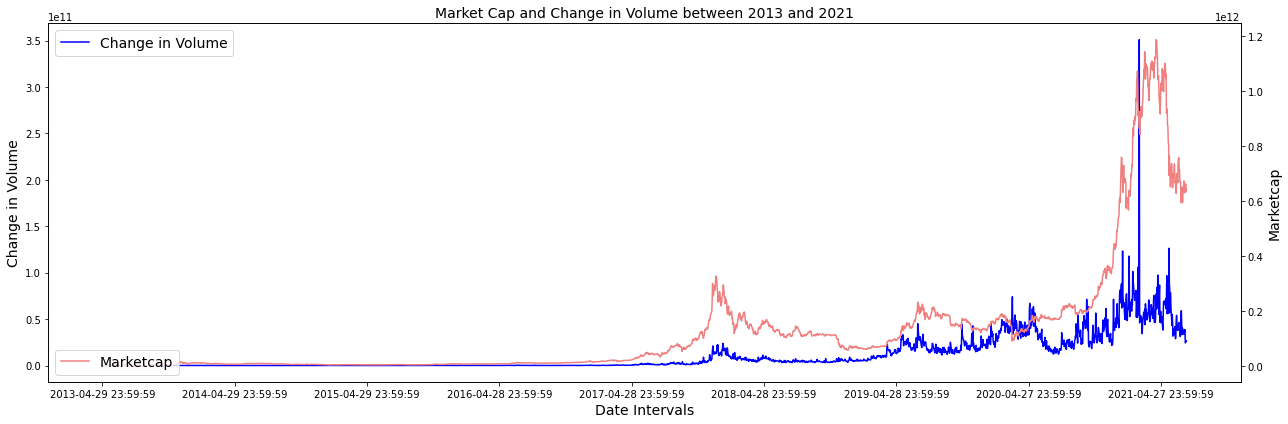

In [187]:
date = df['Date']
y1 = df['Volume']
y2 = df['Marketcap']

plt.rcParams["figure.figsize"] = [18, 6]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, y1, label='Change in Volume', color='blue')
ax2.plot(date, y2, label='Marketcap',color='lightcoral')

date_intervals = df['Date'][::365]
plt.xticks(date_intervals, rotation=90)

ax1.set_xlabel("Date Intervals",size=14)
ax1.set_ylabel("Change in Volume",size=14)
ax2.set_ylabel("Marketcap",size=14)

plt.title('Market Cap and Change in Volume between 2013 and 2021', size=14)
ax1.legend(loc="upper left", fontsize=14)
ax2.legend(loc="lower left", fontsize=14)

plt.plot()
plt.show()

Here, it can be seen that there is an outlier that lead the series to have an enourmous peak around the beginning of 2021. To see the series without the outlier, we filter the volume data.

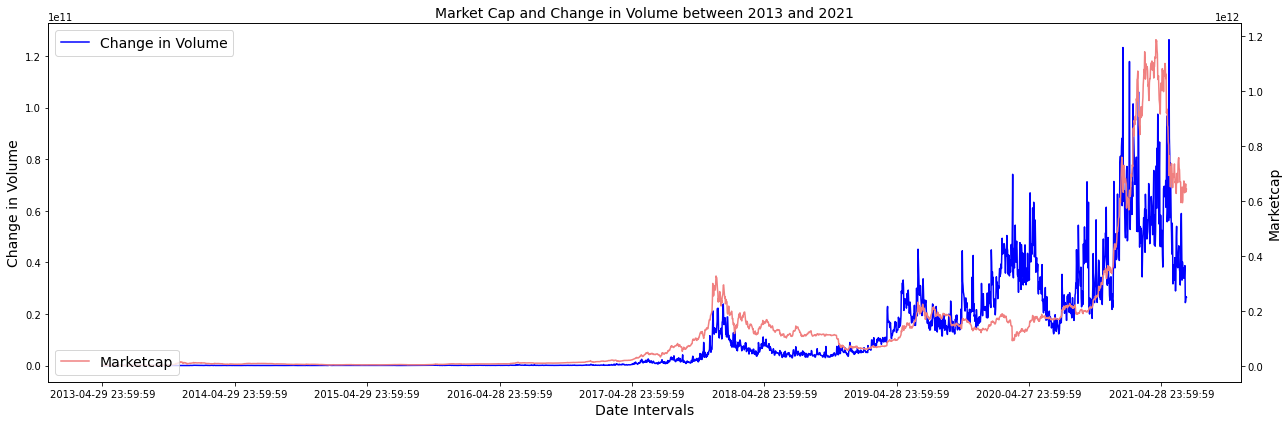

In [188]:
#filtering volume data to see the time series without the outlier
filter = df.copy(deep=True)

filter = filter[filter['Volume'] < 1.5e+11]

date = filter['Date']
y1 = filter['Volume']
y2 = filter['Marketcap']

plt.rcParams["figure.figsize"] = [18, 6]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, y1, label='Change in Volume', color='blue')
ax2.plot(date, y2, label='Marketcap',color='lightcoral')

date_intervals = filter['Date'][::365]
plt.xticks(date_intervals, rotation=90)

ax1.set_xlabel("Date Intervals",size=14)
ax1.set_ylabel("Change in Volume",size=14)
ax2.set_ylabel("Marketcap",size=14)

plt.title('Market Cap and Change in Volume between 2013 and 2021', size=14)
ax1.legend(loc="upper left", fontsize=14)
ax2.legend(loc="lower left", fontsize=14)

plt.plot()
plt.show()

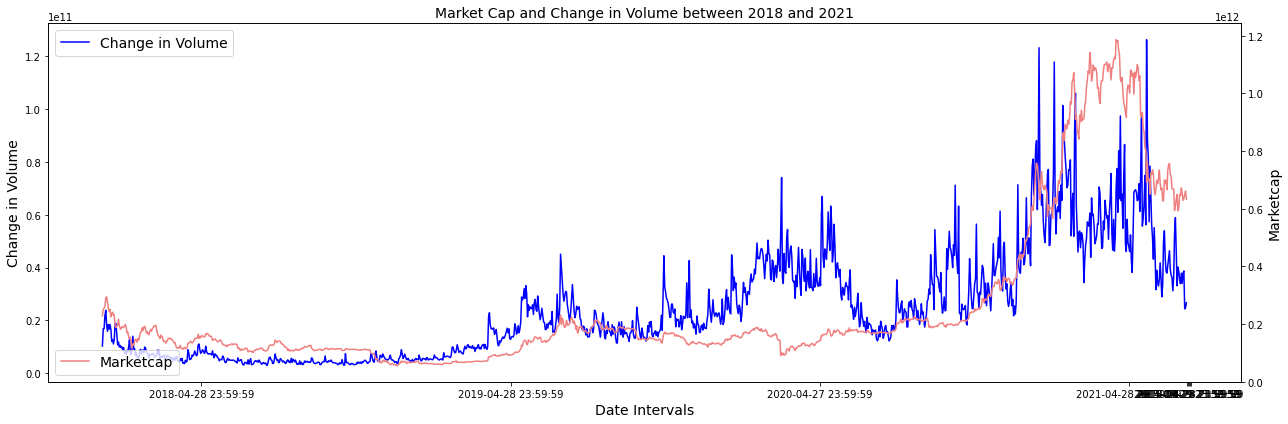

In [189]:
start_date = '2018-01-01'
end_date   = '2021-07-06'
mask_2 = (filter['Date'] > start_date) & (filter['Date'] <= end_date)
filter_recent = filter.loc[mask_2]
filter_recent

date = filter_recent['Date']
y1 = filter_recent['Volume']
y2 = filter_recent['Marketcap']

plt.rcParams["figure.figsize"] = [18, 6]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, y1, label='Change in Volume', color='blue')
ax2.plot(date, y2, label='Marketcap',color='lightcoral')

date_intervals = filter['Date'][::365]
plt.xticks(date_intervals, rotation=90)

ax1.set_xlabel("Date Intervals",size=14)
ax1.set_ylabel("Change in Volume",size=14)
ax2.set_ylabel("Marketcap",size=14)

plt.title('Market Cap and Change in Volume between 2018 and 2021', size=14)
ax1.legend(loc="upper left", fontsize=14)
ax2.legend(loc="lower left", fontsize=14)

plt.plot()
plt.show()

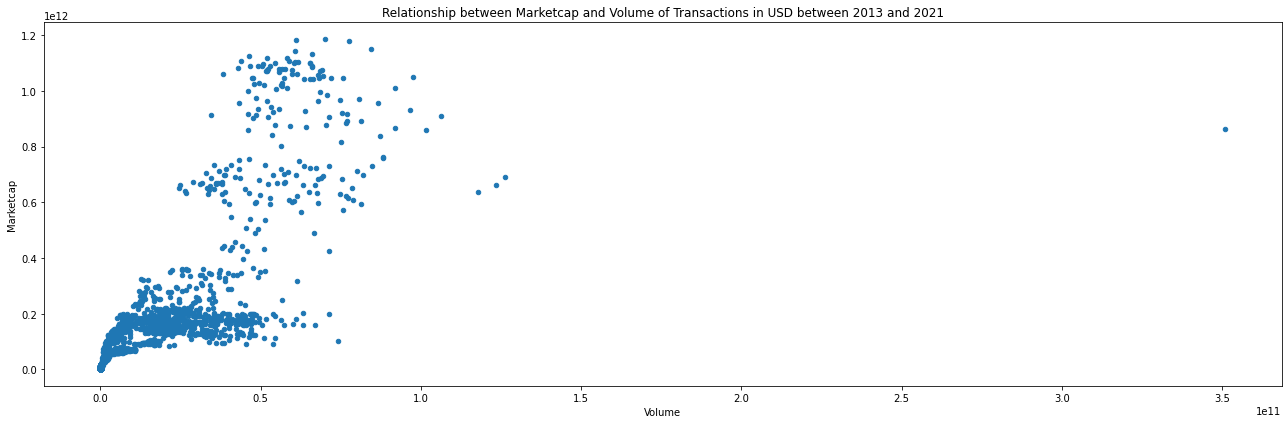

In [190]:
#scatter plot
df['Marketcap'] = df['Marketcap']
df['Volume'] = df['Volume']

ax = df[['Volume', 'Marketcap']].plot.scatter(x='Volume', y='Marketcap')
plt.title("Relationship between Marketcap and Volume of Transactions in USD between 2013 and 2021")


plt.show()

In the data, it is seen that there is an outlier which stands far from the other data points. We can remove this outlier because the other points are seen in positive correlation and the removal of that outlier can cause a different understanding of the correlation.

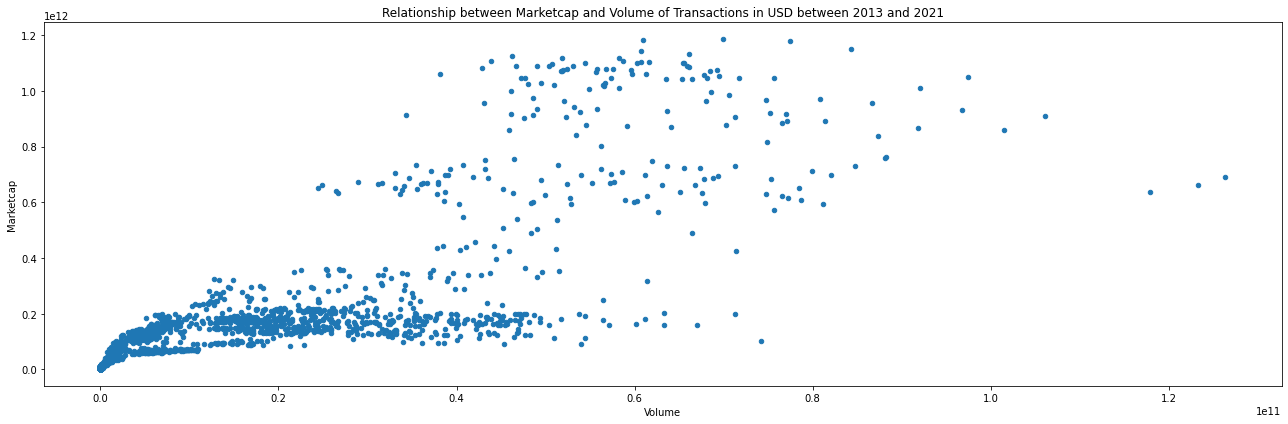

In [191]:
#filtering volume data to see the scatter plot without the outlier

ax = filter[['Volume', 'Marketcap']].plot.scatter(x='Volume', y='Marketcap')
plt.title("Relationship between Marketcap and Volume of Transactions in USD between 2013 and 2021")

plt.show()

In this graph where it is shown the relationship between marketcap and volume of transactions in USD, it can be seen that that there is not a strong correlation between the marketcap and the volume of transactions in USD. 

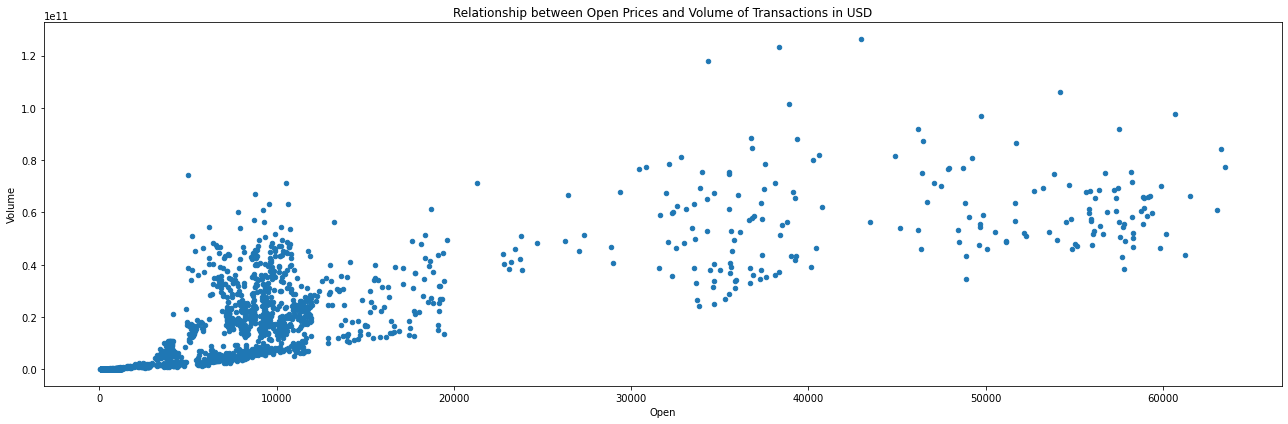

In [192]:
ax = filter[['Open', 'Volume']].plot.scatter(x='Open', y='Volume', s=20)

plt.title("Relationship between Open Prices and Volume of Transactions in USD")

plt.show()

Here, it can be seen that there is positive correlation between the open prices and the volume of transactions in USD.

### Analysis of Ethereum and Bitcoin

In [193]:
df_merged = df.merge(df_2, on='Date')
df_merged

,SNo_x,Name_x,Symbol_x,Date,High_x,Low_x,Open_x,Close_x,Volume_x,Marketcap_x,SNo_y,Name_y,Symbol_y,High_y,Low_y,Open_y,Close_y,Volume_y,Marketcap_y
0,832,Bitcoin,BTC,2015-08-08 23:59:59,279.93,260.71,279.74,261.00,"58,533,000.00","3,778,049,023.65",1,Ethereum,ETH,2.80,0.71,2.79,0.75,"674,188.00","45,486,894.24"
1,833,Bitcoin,BTC,2015-08-09 23:59:59,267.00,260.47,261.12,265.08,"23,789,600.00","3,838,130,129.93",2,Ethereum,ETH,0.88,0.63,0.71,0.70,"532,170.00","42,399,573.50"
2,834,Bitcoin,BTC,2015-08-10 23:59:59,267.03,262.60,265.48,264.47,"20,979,400.00","3,830,352,068.75",3,Ethereum,ETH,0.73,0.64,0.71,0.71,"405,283.00","42,818,364.39"
3,835,Bitcoin,BTC,2015-08-11 23:59:59,270.39,264.09,264.34,270.39,"25,433,900.00","3,917,142,818.85",4,Ethereum,ETH,1.13,0.66,0.71,1.07,"1,463,100.00","64,569,288.43"
4,836,Bitcoin,BTC,2015-08-12 23:59:59,270.67,265.47,270.60,266.38,"26,815,400.00","3,859,888,131.00",5,Ethereum,ETH,1.29,0.88,1.06,1.22,"2,150,620.00","73,645,010.99"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2987,Bitcoin,BTC,2021-07-02 23:59:59,"33,939.59","32,770.68","33,549.60","33,897.05","38,728,974,942.25","635,450,784,106.09",2156,Ethereum,ETH,"2,155.60","2,021.82","2,109.89","2,150.04","31,796,212,553.95","250,552,745,326.39"
2156,2988,Bitcoin,BTC,2021-07-03 23:59:59,"34,909.26","33,402.70","33,854.42","34,668.55","24,383,958,643.26","649,939,701,346.23",2157,Ethereum,ETH,"2,237.57","2,117.59","2,150.84","2,226.11","17,433,361,640.79","259,447,545,607.53"
2157,2989,Bitcoin,BTC,2021-07-04 23:59:59,"35,937.57","34,396.48","34,665.56","35,287.78","24,924,307,911.11","661,574,836,314.86",2158,Ethereum,ETH,"2,384.29","2,190.84","2,226.55","2,321.72","18,787,107,473.09","270,621,669,241.05"
2158,2990,Bitcoin,BTC,2021-07-05 23:59:59,"35,284.34","33,213.66","35,284.34","33,746.00","26,721,554,282.07","632,696,207,199.70",2159,Ethereum,ETH,"2,321.92","2,163.04","2,321.92","2,198.58","20,103,794,829.49","256,297,846,064.35"


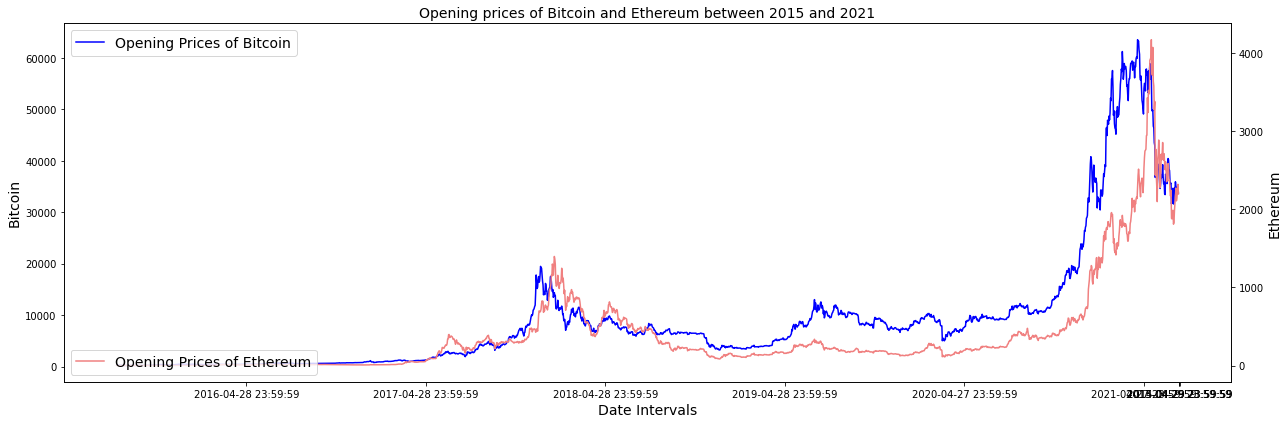

In [194]:
date = df_merged['Date']
y1 = df_merged['Open_x']
y2 = df_merged['Open_y']

plt.rcParams["figure.figsize"] = [18, 6]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, y1, label ='Opening Prices of Bitcoin', color='blue')
ax2.plot(date, y2, label='Opening Prices of Ethereum',color='lightcoral')

date_intervals = df['Date'][::365]
plt.xticks(date_intervals, rotation=90)

ax1.set_xlabel("Date Intervals",size=14)
ax1.set_ylabel("Bitcoin",size=14)
ax2.set_ylabel("Ethereum",size=14)

plt.title('Opening prices of Bitcoin and Ethereum between 2015 and 2021', size=14)
ax1.legend(loc="upper left", fontsize=14)
ax2.legend(loc="lower left", fontsize=14)

plt.plot()
plt.show()

In this graph, we want to visualize the trends of opening prices and Ethereum prices. It can be seen that the opening prices of Bitcoin and Ethereum between 2015 and 2021 has similar patterns. For example both of them had a huge rise after 2020 and after 2021 they both had a decrease.

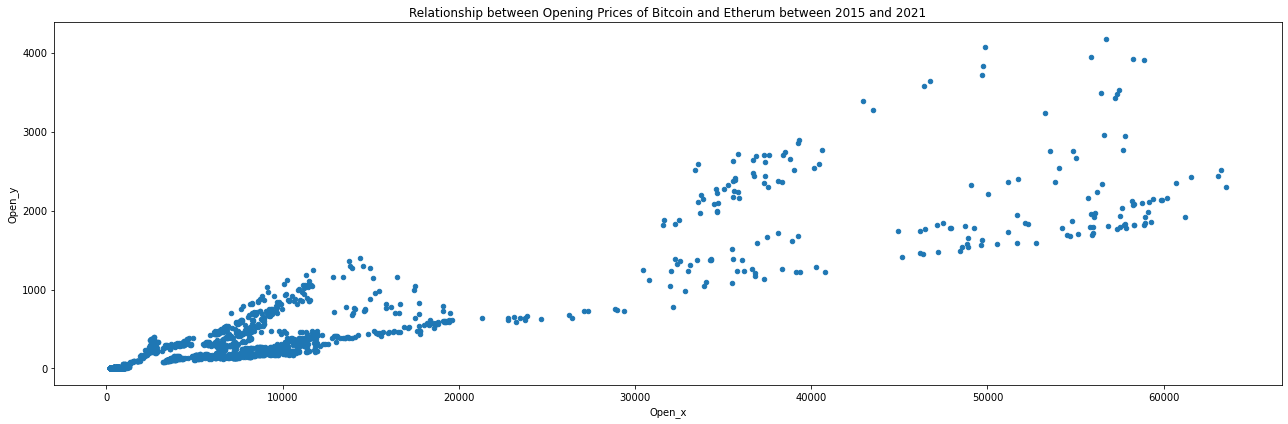

In [195]:
ax = df_merged[['Open_x', 'Open_y']].plot.scatter(x='Open_x', y='Open_y')
plt.title("Relationship between Opening Prices of Bitcoin and Etherum between 2015 and 2021")

plt.show()

In this graph where it is shown the relationship between opening prices of bitcoin and Etherum prices, we can not say that there is a correlation between them but we can not say that it is a strong correlation

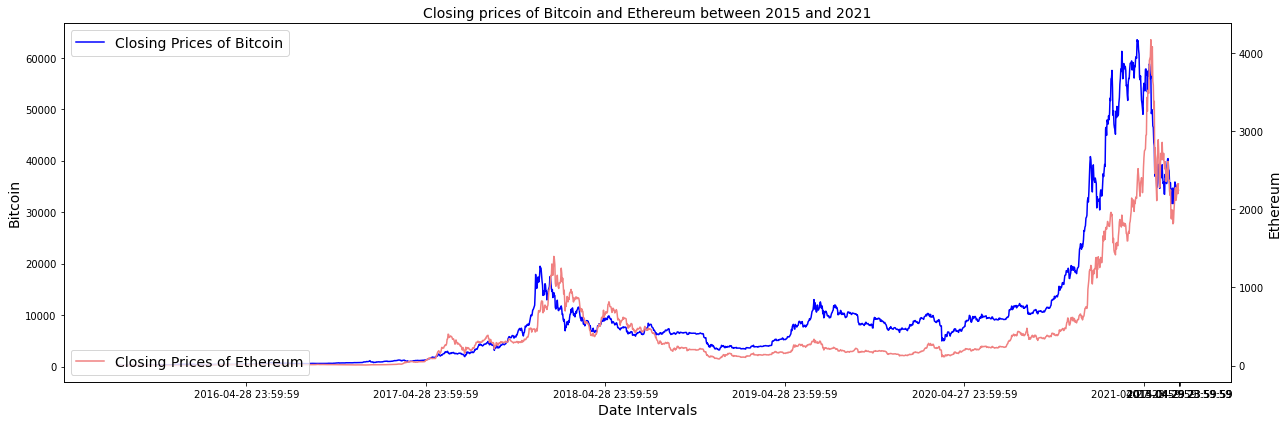

In [196]:
date = df_merged['Date']
y1 = df_merged['Close_x']
y2 = df_merged['Close_y']

plt.rcParams["figure.figsize"] = [18, 6]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, y1, label ='Closing Prices of Bitcoin', color='blue')
ax2.plot(date, y2, label='Closing Prices of Ethereum',color='lightcoral')

date_intervals = df['Date'][::365]
plt.xticks(date_intervals, rotation=90)

ax1.set_xlabel("Date Intervals",size=14)
ax1.set_ylabel("Bitcoin",size=14)
ax2.set_ylabel("Ethereum",size=14)

plt.title('Closing prices of Bitcoin and Ethereum between 2015 and 2021', size=14)
ax1.legend(loc="upper left", fontsize=14)
ax2.legend(loc="lower left", fontsize=14)

plt.plot()
plt.show()

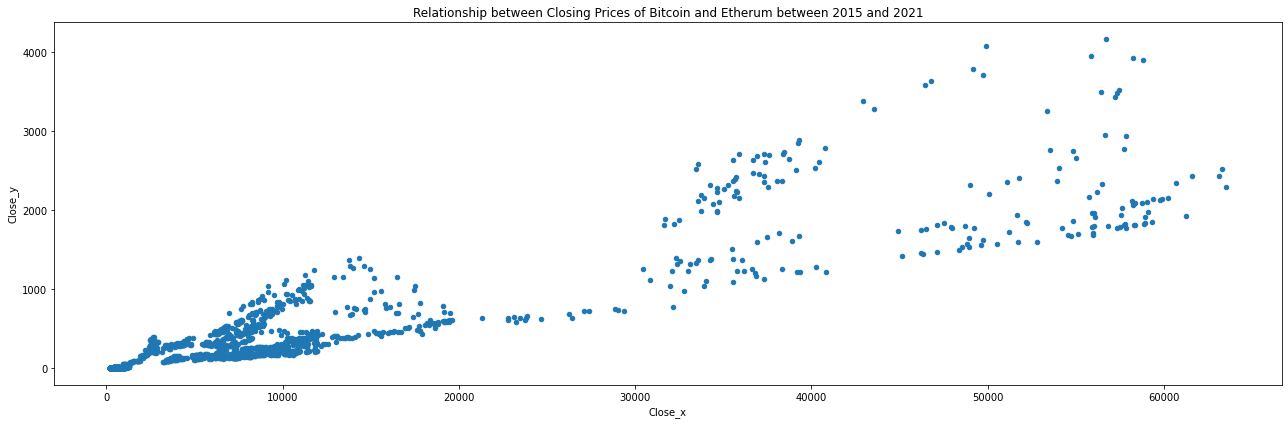

In [197]:
ax = df_merged[['Close_x', 'Close_y']].plot.scatter(x='Close_x', y='Close_y')
plt.title("Relationship between Closing Prices of Bitcoin and Etherum between 2015 and 2021")

plt.show()

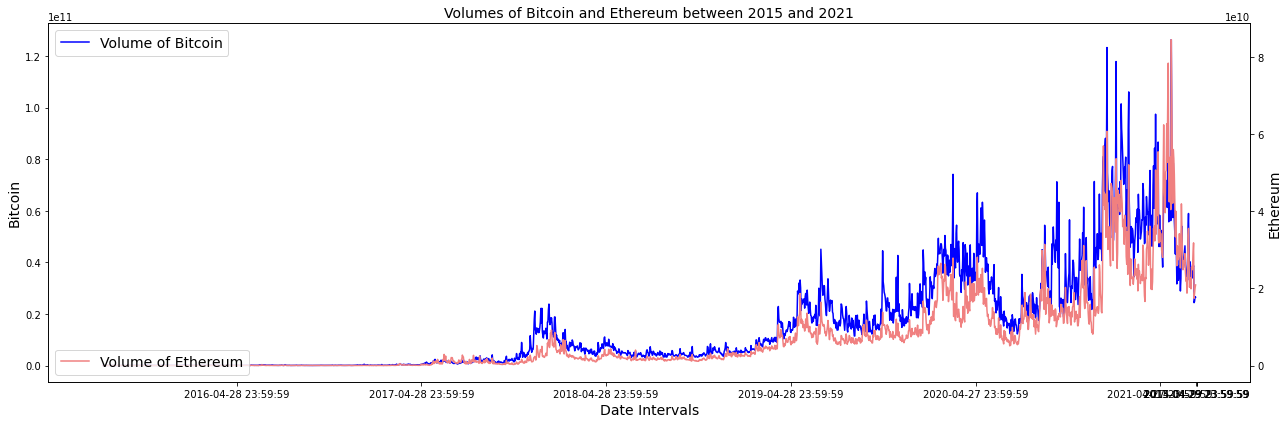

In [198]:
filter_2 = df_merged.copy(deep=True)

filter_2 = filter_2[filter_2['Volume_x'] < 1.5e+11]

date = filter_2['Date']
y1 = filter_2['Volume_x']
y2 = filter_2['Volume_y']

plt.rcParams["figure.figsize"] = [18, 6]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, y1, label ='Volume of Bitcoin', color='blue')
ax2.plot(date, y2, label='Volume of Ethereum',color='lightcoral')

date_intervals = df['Date'][::365]
plt.xticks(date_intervals, rotation=90)

ax1.set_xlabel("Date Intervals",size=14)
ax1.set_ylabel("Bitcoin",size=14)
ax2.set_ylabel("Ethereum",size=14)

plt.title('Volumes of Bitcoin and Ethereum between 2015 and 2021', size=14)
ax1.legend(loc="upper left", fontsize=14)
ax2.legend(loc="lower left", fontsize=14)

plt.plot()
plt.show()

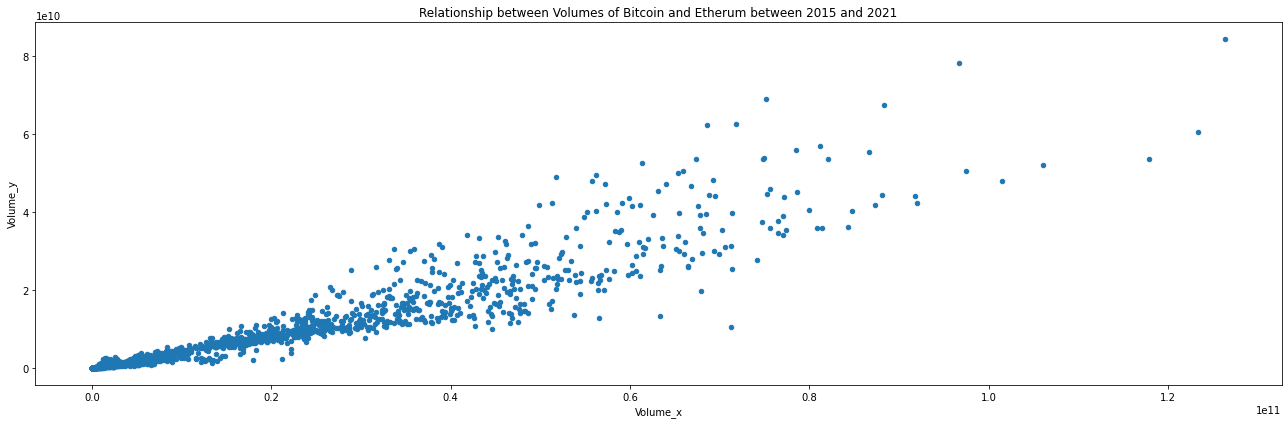

In [199]:
ax = filter_2[['Volume_x', 'Volume_y']].plot.scatter(x='Volume_x', y='Volume_y')
plt.title("Relationship between Volumes of Bitcoin and Etherum between 2015 and 2021")

plt.show()

Here, there is a positive correlation between volumes of bitcoin and Etherum between 2015 and 2021.

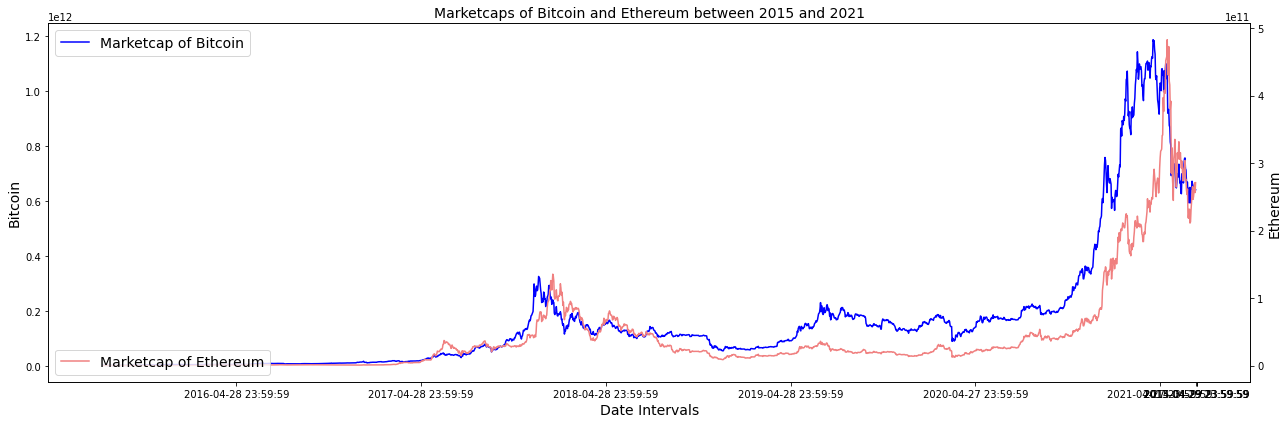

In [200]:
date = df_merged['Date']
y1 = df_merged['Marketcap_x']
y2 = df_merged['Marketcap_y']

plt.rcParams["figure.figsize"] = [18, 6]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, y1, label ='Marketcap of Bitcoin', color='blue')
ax2.plot(date, y2, label='Marketcap of Ethereum',color='lightcoral')

date_intervals = df['Date'][::365]
plt.xticks(date_intervals, rotation=90)

ax1.set_xlabel("Date Intervals",size=14)
ax1.set_ylabel("Bitcoin",size=14)
ax2.set_ylabel("Ethereum",size=14)

plt.title('Marketcaps of Bitcoin and Ethereum between 2015 and 2021', size=14)
ax1.legend(loc="upper left", fontsize=14)
ax2.legend(loc="lower left", fontsize=14)

plt.plot()
plt.show()

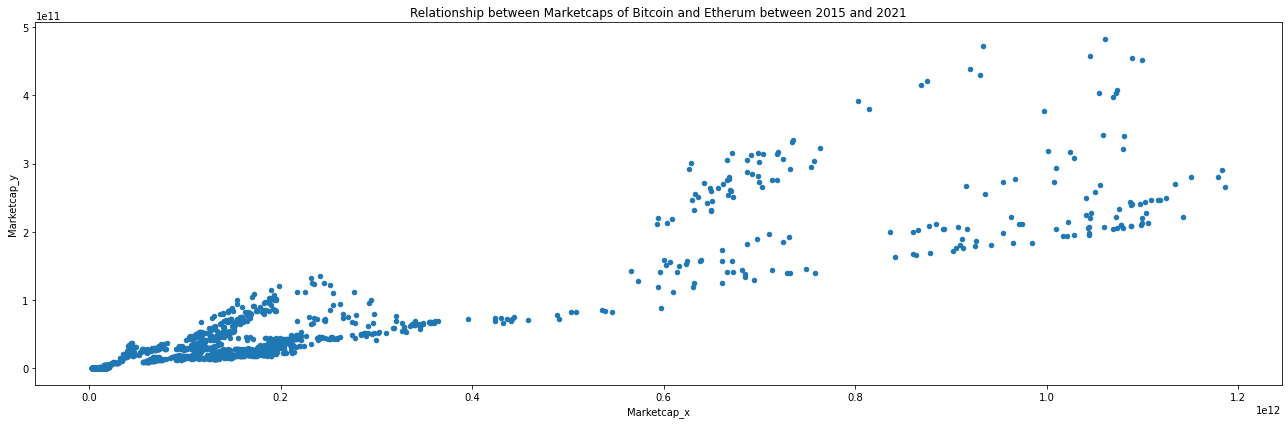

In [201]:
ax = df_merged[['Marketcap_x', 'Marketcap_y']].plot.scatter(x='Marketcap_x', y='Marketcap_y')
plt.title("Relationship between Marketcaps of Bitcoin and Etherum between 2015 and 2021")

plt.show()

### Analysis of Bitcoin Depending on Date

In [202]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.49,134.00,134.44,144.54,0.00,"1,603,768,864.50"
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.93,134.05,144.00,139.00,0.00,"1,542,813,125.00"
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.89,107.72,139.00,116.99,0.00,"1,298,954,593.75"
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.60,92.28,116.38,105.21,0.00,"1,168,517,495.25"
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.13,79.10,106.25,97.75,0.00,"1,085,995,168.75"


In [203]:
df.Date = pd.to_datetime(df.Date)

df.index = df.Date
df = df.resample('D').mean()

df_month = df.resample('M').mean()


df_year = df.resample('A-DEC').mean()


df_Q = df.resample('Q-DEC').mean()

In [204]:
df_month.head()

,SNo,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,
2013-04-30,1.50,147.21,134.03,139.22,141.77,0.00,"1,573,290,994.75"
2013-05-31,18.00,123.95,114.25,120.29,119.99,0.00,"1,339,718,001.56"
2013-06-30,48.50,111.30,104.60,108.86,107.76,0.00,"1,216,792,343.08"
2013-07-31,79.00,93.87,86.72,90.31,90.51,0.00,"1,034,233,237.78"
2013-08-31,110.00,116.00,111.39,113.04,113.91,0.00,"1,317,465,812.41"


In [205]:
df_year.head()

,SNo,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,
2013-12-31,124.00,269.86,240.09,255.63,257.97,"566,740.08","3,066,581,467.19"
2014-12-31,430.00,540.31,514.37,528.40,527.24,"25,093,646.86","6,782,806,505.59"
2015-12-31,795.00,278.15,266.81,272.15,272.45,"33,905,566.32","3,922,141,506.87"
2016-12-31,"1,160.50",574.30,560.45,567.14,568.49,"85,924,510.89","8,929,758,499.47"
2017-12-31,"1,526.00","4,144.69","3,811.71","3,970.64","4,006.03","2,382,866,906.31","66,457,515,732.16"


In [206]:
df_Q.head()

,SNo,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,
2013-06-30,32.00,118.66,110.29,115.45,114.86,0.00,"1,288,596,989.37"
2013-09-30,109.50,114.47,108.29,110.97,111.29,0.00,"1,288,953,943.92"
2013-12-31,201.50,528.80,460.77,496.29,502.66,"1,521,573.91","6,061,741,839.39"
2014-03-31,292.50,724.76,676.61,703.84,700.59,"35,411,690.16","8,671,937,557.29"
2014-06-30,383.00,531.67,507.44,518.87,520.93,"22,137,104.18","6,663,578,872.46"


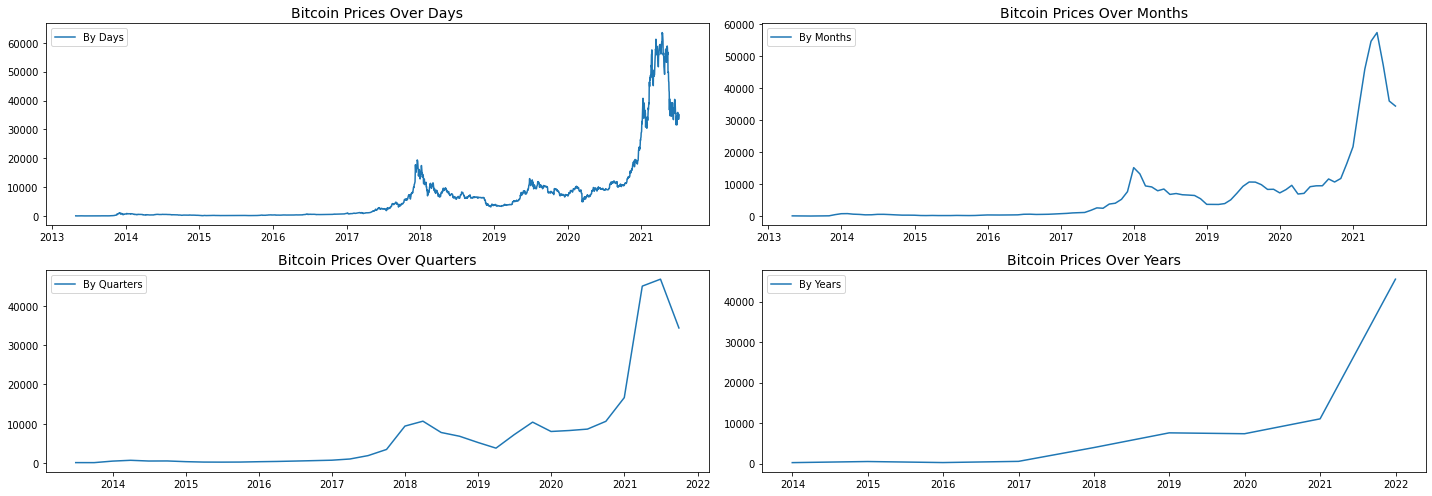

In [207]:
fig = plt.figure(figsize=[20, 7])

plt.subplot(221)
plt.plot(df.Open, '-', label='By Days')
plt.legend()
plt.title('Bitcoin Prices Over Days', fontsize=14)

plt.subplot(222)
plt.plot(df_month.Open, '-', label='By Months')
plt.legend()
plt.title('Bitcoin Prices Over Months', fontsize=14)

plt.subplot(223)
plt.plot(df_Q.Open, '-', label='By Quarters')
plt.legend()
plt.title('Bitcoin Prices Over Quarters', fontsize=14)

plt.subplot(224)
plt.plot(df_year.Open, '-', label='By Years')
plt.legend()
plt.title('Bitcoin Prices Over Years', fontsize=14)

# plt.tight_layout()
plt.plot()
plt.show()

From this visualization, we can see the pattern of the Open Prices and its change in over dyas, months, quarters and years. It can be seen that Open prices of Bitcoin has an upward trend howewer there is a significant recession during 2021 but even this value is higher than the historical data.




## Statistical Analysis & Hypothesis Testing


### *Alternative Hypothesis:* Volume contribute to open price of the next day.


**Null Hypothesis:** Volume do not contribute to open price of the next day.

**Alternative Hypothesis:** Volume contribute to open price of the next day.

In [208]:
df.shape

(2991, 7)

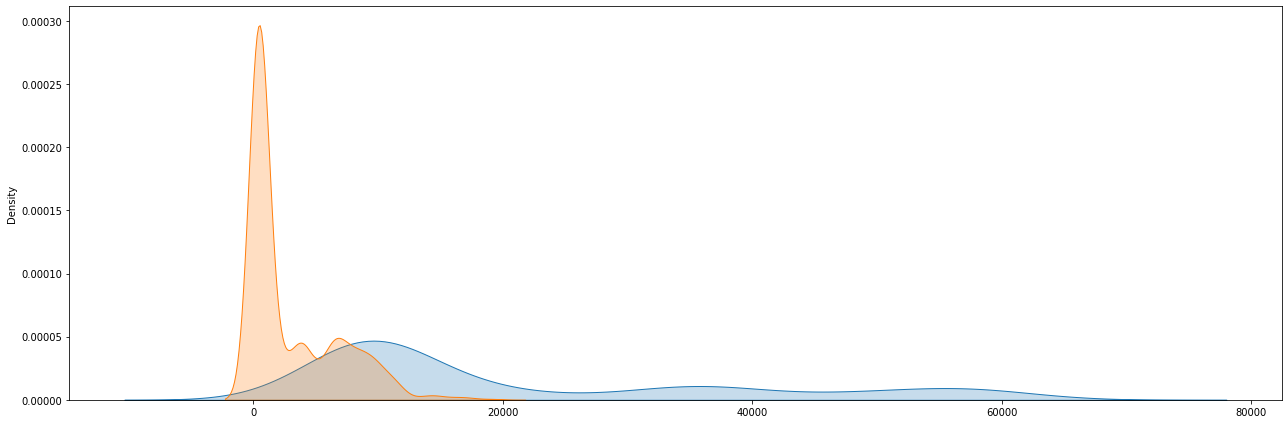

In [209]:
hypothesis_df = df.copy()
hypothesis_df = hypothesis_df[hypothesis_df['Volume'] < 1.5e+11]

hypothesis_df.sort_values(by=['Volume'], inplace=True, ascending=False)

testing_df = hypothesis_df.head(600)
other_df = hypothesis_df.tail(2391)

ax = sns.kdeplot(testing_df["Open"].rename(""),shade=True)
sns.kdeplot(other_df["Open"].rename(""), ax=ax, shade= True)
plt.show()

In [210]:
alpha = 0.05  #significance value
testing_df_val = testing_df["Open"]
other_df_val = other_df["Open"]

_, p_value = stats.ttest_ind(a=testing_df_val, b=other_df_val, equal_var=False)
print("P value: ",format(p_value,".2E"))

if(p_value < alpha):
  print("we reject the null hypothesis")
else:
  print("we fail to reject the null hypothesis")

P value:  2.05E-101
we reject the null hypothesis


### *Alternative Hypothesis:* Close prices contribute to open price of the next day.

**Null Hypothesis:** Close prices do not contribute to open price of the next day.

**Alternative Hypothesis:** Close prices contribute to open price of the next day.

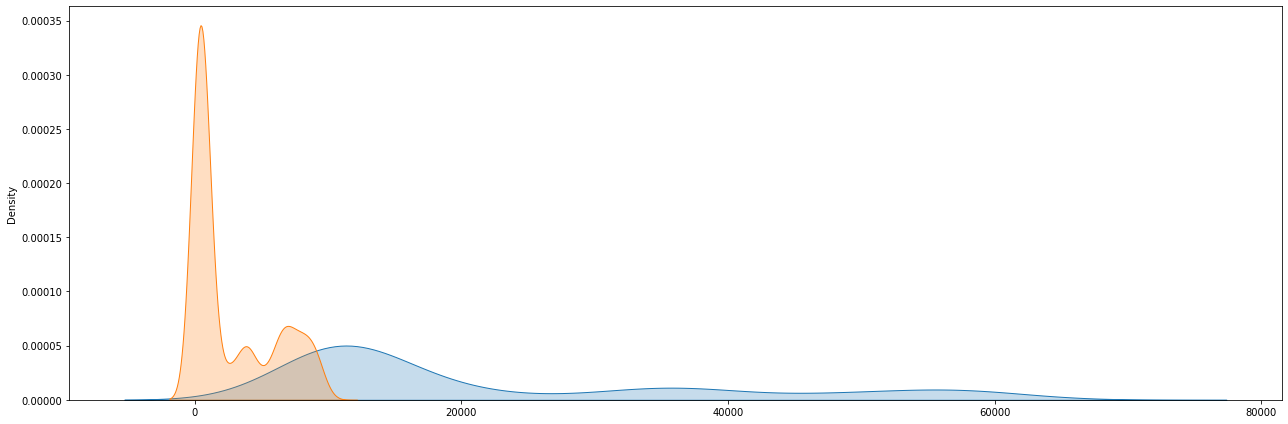

In [211]:
hypothesis_df = df.copy()
hypothesis_df.sort_values(by=['Close'], inplace=True, ascending=False)

testing_df = hypothesis_df.head(600)
other_df = hypothesis_df.tail(2391)

ax = sns.kdeplot(testing_df["Open"].rename(""),shade=True)
sns.kdeplot(other_df["Open"].rename(""), ax=ax, shade= True)
plt.show()

In [212]:
alpha = 0.05  #significance value
testing_df_val = testing_df["Open"]
other_df_val = other_df["Open"]

_, p_value = stats.ttest_ind(a=testing_df_val, b=other_df_val, equal_var=False)
print("P value: ",format(p_value,".2E"))

if(p_value < alpha):
  print("we reject the null hypothesis")
else:
  print("we fail to reject the null hypothesis")

P value:  5.49E-119
we reject the null hypothesis


### *Alternative Hypothesis:* Open prices contribute to high prices of the next day.

**Null Hypothesis:** Open prices do not contribute to high prices of the next day.

**Alternative Hypothesis:** Open prices contribute to high prices of the next day.

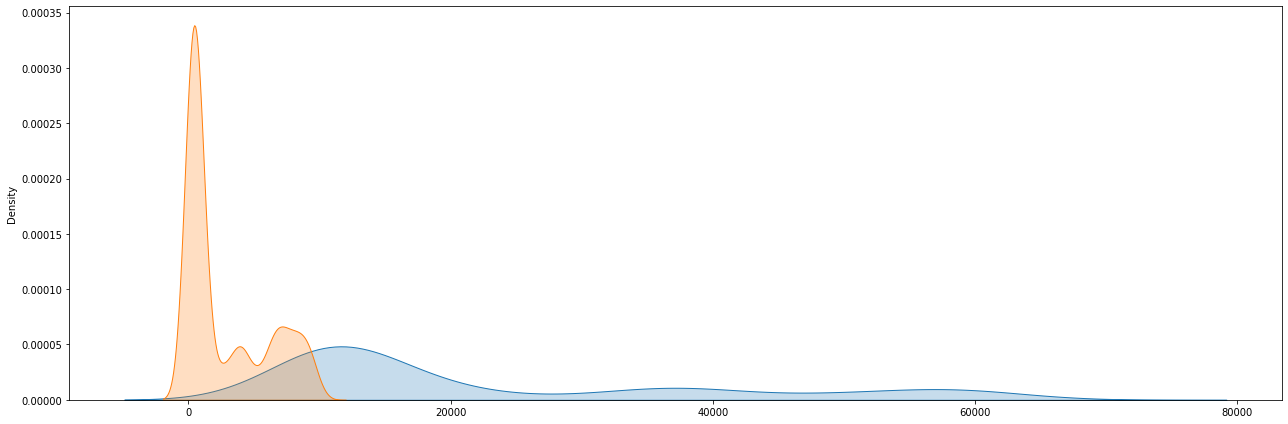

In [213]:
hypothesis_df = df.copy()
hypothesis_df.sort_values(by=['Open'], inplace=True, ascending=False)

testing_df = hypothesis_df.head(600)
other_df = hypothesis_df.tail(2391)

ax = sns.kdeplot(testing_df["High"].rename(""),shade=True)
sns.kdeplot(other_df["High"].rename(""), ax=ax, shade= True)
plt.show()

In [214]:
alpha = 0.05  #significance value
testing_df_val = testing_df["High"]
other_df_val = other_df["High"]

_, p_value = stats.ttest_ind(a=testing_df_val, b=other_df_val, equal_var=False)
print("P value: ",format(p_value,".2E"))

if(p_value < alpha):
  print("we reject the null hypothesis")
else:
  print("we fail to reject the null hypothesis")

P value:  2.61E-119
we reject the null hypothesis


### *Alternative Hypothesis:* Open prices contribute to low prices of the next day.

**Null Hypothesis:** Open prices do not contribute to low prices of the next day.

**Alternative Hypothesis:** Open prices contribute to low prices of the next day.

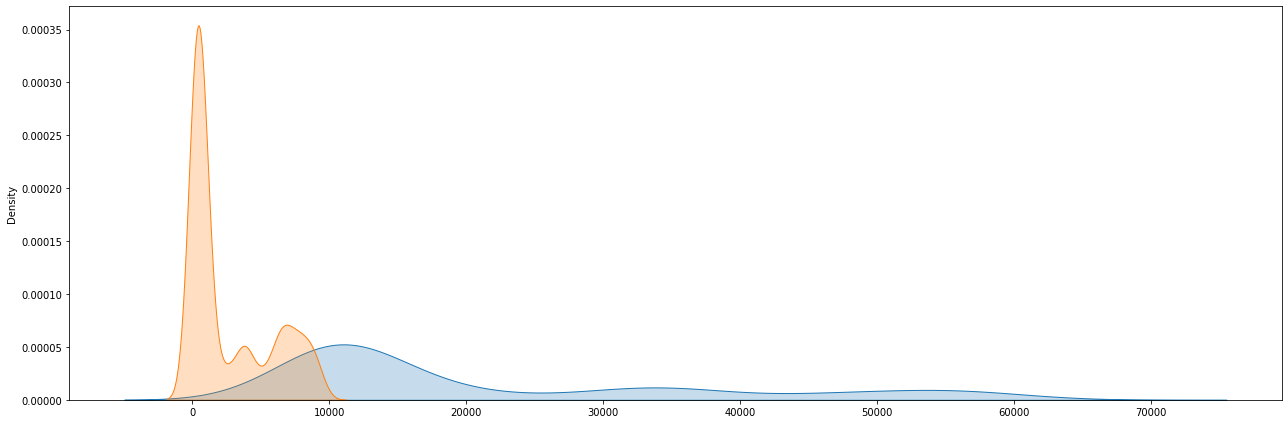

In [215]:
hypothesis_df = df.copy()
hypothesis_df.sort_values(by=['Open'], inplace=True, ascending=False)

testing_df = hypothesis_df.head(600)
other_df = hypothesis_df.tail(2391)

ax = sns.kdeplot(testing_df["Low"].rename(""),shade=True)
sns.kdeplot(other_df["Low"].rename(""), ax=ax, shade= True)
plt.show()

In [216]:
alpha = 0.05  #significance value
testing_df_val = testing_df["Low"]
other_df_val = other_df["Low"]

_, p_value = stats.ttest_ind(a=testing_df_val, b=other_df_val, equal_var=False)
print("P value: ",format(p_value,".2E"))

if(p_value < alpha):
  print("we reject the null hypothesis")
else:
  print("we fail to reject the null hypothesis")

P value:  4.10E-119
we reject the null hypothesis


### *Alternative Hypothesis:* Open prices of Bitcoin contribute to open prices of Ethereum.

**Null Hypothesis:** Open prices of Bitcoin do not contribute to open prices of Ethereum.

**Alternative Hypothesis:** Open prices of Bitcoin contribute to open prices of Ethereum.

In [217]:
df_merged.shape

(2160, 19)

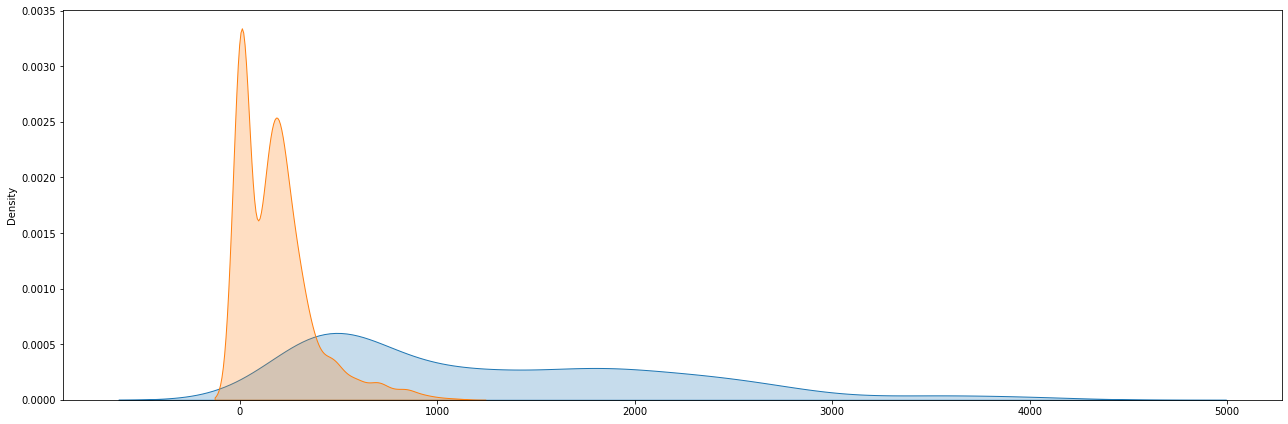

In [218]:
hypothesis_df = df_merged.copy()
hypothesis_df.sort_values(by=['Open_x'], inplace=True, ascending=False)

testing_df = hypothesis_df.head(400)
other_df = hypothesis_df.tail(1760)

ax = sns.kdeplot(testing_df["Open_y"].rename(""),shade=True)
sns.kdeplot(other_df["Open_y"].rename(""), ax=ax, shade= True)
plt.show()

In [219]:
alpha = 0.05  #significance value
testing_df_val = testing_df["Open_y"]
other_df_val = other_df["Open_y"]

_, p_value = stats.ttest_ind(a=testing_df_val, b=other_df_val, equal_var=False)
print("P value: ",format(p_value,".2E"))

if(p_value < alpha):
  print("we reject the null hypothesis")
else:
  print("we fail to reject the null hypothesis")

P value:  1.30E-79
we reject the null hypothesis


### *Alternative Hypothesis:* High prices of Bitcoin contribute to the high prices of Ethereum.

**Null Hypothesis:** High prices of Bitcoin do not contribute to the high prices of Ethereum.

**Alternative Hypothesis:** High prices of Bitcoin contribute to the high prices of Ethereum.

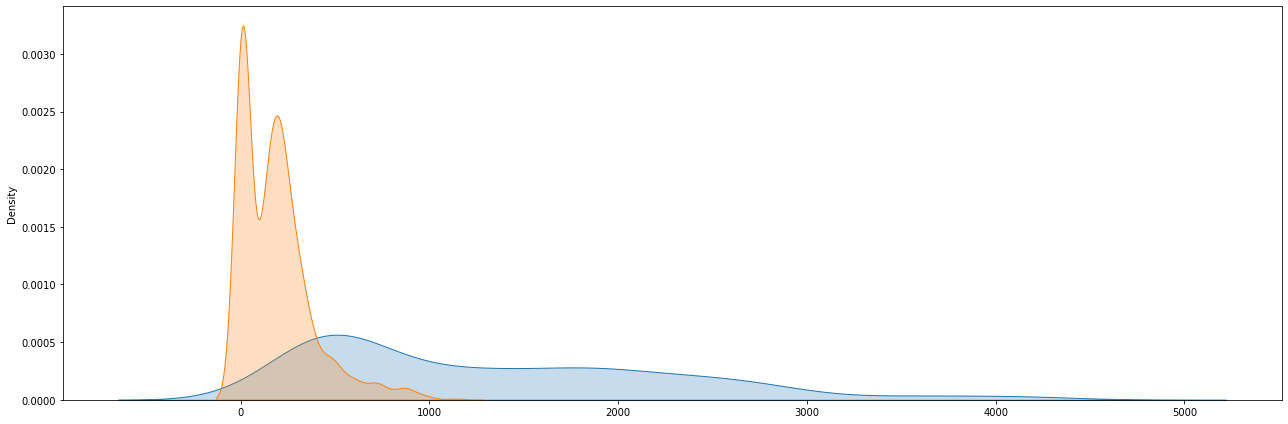

In [220]:
hypothesis_df = df_merged.copy()
hypothesis_df.sort_values(by=['High_x'], inplace=True, ascending=False)

testing_df = hypothesis_df.head(400)
other_df = hypothesis_df.tail(1760)

ax = sns.kdeplot(testing_df["High_y"].rename(""),shade=True)
sns.kdeplot(other_df["High_y"].rename(""), ax=ax, shade= True)
plt.show()

In [221]:
alpha = 0.05  #significance value
testing_df_val = testing_df["High_y"]
other_df_val = other_df["High_y"]

_, p_value = stats.ttest_ind(a=testing_df_val, b=other_df_val, equal_var=False)
print("P value: ",format(p_value,".2E"))

if(p_value < alpha):
  print("we reject the null hypothesis")
else:
  print("we fail to reject the null hypothesis")

P value:  7.92E-80
we reject the null hypothesis


## Machine Learning


In [222]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [223]:
df_ml = df_merged
df_ml = df_ml[df_ml['Volume_x'] < 1.5e+11]

In [224]:
X = df_ml[["Close_x", "High_x", "Low_x", "Volume_x", "Open_y", "Close_y", "High_y", "Low_y", "Volume_y", "Marketcap_y"]]
y = df_ml["Open_x"]

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=12)
print(f'Train: {X_train.shape, y_train.shape}  \nTest: {X_test.shape, y_test.shape}')

Train: ((1727, 10), (1727,))  
Test: ((432, 10), (432,))


### KNN Regression

In [226]:
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

# Score
score_knn = knn_model.score(X_test, y_test)
score_knn

0.9742473870331814

In [227]:
for i in range(1,6):
  knn_model_temp = KNeighborsRegressor(n_neighbors=i).fit(X_train, y_train)
  preds = knn_model_temp.predict(X_test)
  print("score: ", knn_model_temp.score(X_test, y_test), "for n_neighbors: ", i)

score:  0.9586767190487596 for n_neighbors:  1
score:  0.9694514277015909 for n_neighbors:  2
score:  0.9798145609877005 for n_neighbors:  3
score:  0.978177248715076 for n_neighbors:  4
score:  0.9742473870331814 for n_neighbors:  5


Hyperparameter tuning: Tries different k values, the best value is at 3.

In [228]:
preds = knn_model.predict(X_test)
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': preds,
                            'Error': y_test - preds})
performance

,True Value,Prediction,Error
1750,"9,185.06","8,719.11",465.95
250,423.93,571.82,-147.88
2101,"58,877.39","55,569.68","3,307.71"
1413,"9,525.07","10,463.21",-938.14
134,462.23,373.28,88.95
...,...,...,...
2068,"59,171.93","57,740.71","1,431.22"
1143,"6,704.77","5,875.69",829.08
488,768.08,761.45,6.63
902,"11,256.00","11,102.08",153.92


In [229]:
metrics.mean_absolute_error(y_test,preds)

941.5684089209653

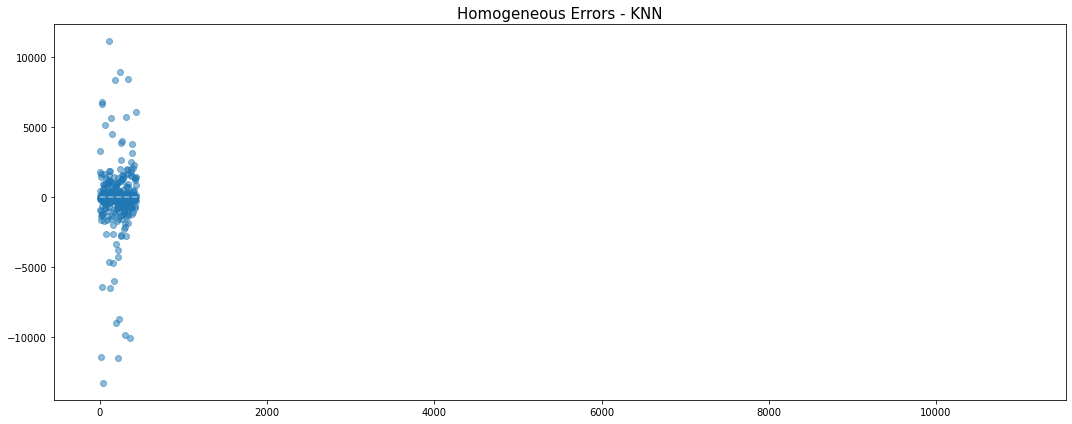

In [230]:
plt.figure(figsize=(15, 6))

ax_x= performance['True Value']
ax_y= performance['Prediction']
yerr= performance['Error']

plt.scatter(range(len(yerr)), yerr, alpha=.5)
plt.title('Homogeneous Errors - KNN', size=15);
plt.hlines(y=0, xmin=0, xmax=11000, linestyle='--', color='white', alpha=.5);

There is no outlier that can be seen.

### Multiple Linear Regression Model

In [231]:
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)

LinearRegression()

In [232]:
y_pred = LinearModel.predict(X_test)

The more flat the trendline is, the better the prediction is.

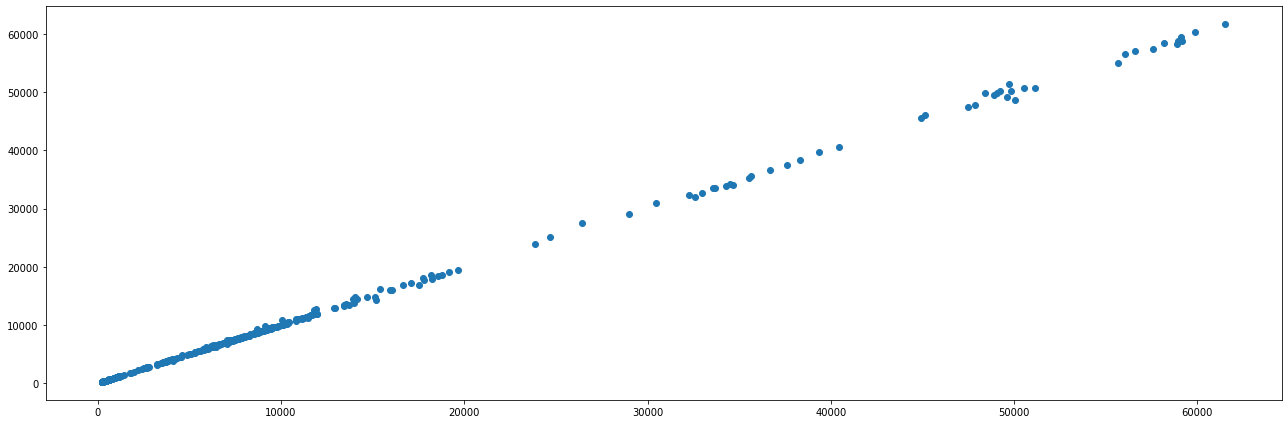

In [233]:
plt.scatter(y_test, y_pred)

In [234]:
metrics.mean_absolute_error(y_test, y_pred)

105.03471394589906

### Decision Tree Regression

In [235]:
for i in range(1,26):
  DTRegressorTemp = DecisionTreeRegressor(random_state=0, max_depth = i)
  DTRegressorTemp.fit(X_train,y_train)
  y_pred_dt = DTRegressorTemp.predict(X_test)
  print("mae: ", metrics.mean_absolute_error(y_test,y_pred_dt), "for max_depth: ", i)

mae:  4596.87282364235 for max_depth:  1
mae:  2127.360644155864 for max_depth:  2
mae:  1091.767343490911 for max_depth:  3
mae:  674.1160135936203 for max_depth:  4
mae:  400.181211591787 for max_depth:  5
mae:  309.8138292446999 for max_depth:  6
mae:  283.0207263739995 for max_depth:  7
mae:  284.5617507880651 for max_depth:  8
mae:  280.84269939520465 for max_depth:  9
mae:  275.2884802340561 for max_depth:  10
mae:  280.0234706656662 for max_depth:  11
mae:  278.5071138335666 for max_depth:  12
mae:  285.74054895595907 for max_depth:  13
mae:  280.06024845175705 for max_depth:  14
mae:  274.9708708492886 for max_depth:  15
mae:  278.7751757251682 for max_depth:  16
mae:  290.0229289452097 for max_depth:  17
mae:  281.15010647134886 for max_depth:  18
mae:  290.05370750727985 for max_depth:  19
mae:  264.5355910482711 for max_depth:  20
mae:  268.62293522941496 for max_depth:  21
mae:  280.0698581721464 for max_depth:  22
mae:  280.0698581721464 for max_depth:  23
mae:  280.069858

Hyperparameter tuning: We tried from 1 to 25, best value is at 20

In [236]:
DTRegressor = DecisionTreeRegressor(random_state=0, max_depth = 20)

In [237]:
DTRegressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20, random_state=0)

In [238]:
y_pred_dt = DTRegressor.predict(X_test)

In [239]:
metrics.mean_absolute_error(y_test,y_pred_dt)

264.5355910482711

### Xgboost Feature Importance

In [242]:
from fastai.tabular import add_datepart

add_datepart(df_merged, 'Date', drop=False)

,SNo_x,Name_x,Symbol_x,Date,High_x,Low_x,Open_x,Close_x,Volume_x,Marketcap_x,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,832,Bitcoin,BTC,2015-08-08 23:59:59,279.93,260.71,279.74,261.00,"58,533,000.00","3,778,049,023.65",...,8,5,220,False,False,False,False,False,False,1439078399
1,833,Bitcoin,BTC,2015-08-09 23:59:59,267.00,260.47,261.12,265.08,"23,789,600.00","3,838,130,129.93",...,9,6,221,False,False,False,False,False,False,1439164799
2,834,Bitcoin,BTC,2015-08-10 23:59:59,267.03,262.60,265.48,264.47,"20,979,400.00","3,830,352,068.75",...,10,0,222,False,False,False,False,False,False,1439251199
3,835,Bitcoin,BTC,2015-08-11 23:59:59,270.39,264.09,264.34,270.39,"25,433,900.00","3,917,142,818.85",...,11,1,223,False,False,False,False,False,False,1439337599
4,836,Bitcoin,BTC,2015-08-12 23:59:59,270.67,265.47,270.60,266.38,"26,815,400.00","3,859,888,131.00",...,12,2,224,False,False,False,False,False,False,1439423999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2987,Bitcoin,BTC,2021-07-02 23:59:59,"33,939.59","32,770.68","33,549.60","33,897.05","38,728,974,942.25","635,450,784,106.09",...,2,4,183,False,False,False,False,False,False,1625270399
2156,2988,Bitcoin,BTC,2021-07-03 23:59:59,"34,909.26","33,402.70","33,854.42","34,668.55","24,383,958,643.26","649,939,701,346.23",...,3,5,184,False,False,False,False,False,False,1625356799
2157,2989,Bitcoin,BTC,2021-07-04 23:59:59,"35,937.57","34,396.48","34,665.56","35,287.78","24,924,307,911.11","661,574,836,314.86",...,4,6,185,False,False,False,False,False,False,1625443199
2158,2990,Bitcoin,BTC,2021-07-05 23:59:59,"35,284.34","33,213.66","35,284.34","33,746.00","26,721,554,282.07","632,696,207,199.70",...,5,0,186,False,False,False,False,False,False,1625529599


In [243]:
df_merged.iloc[:,25:31] =df_merged.iloc[:,25:31].astype(int)

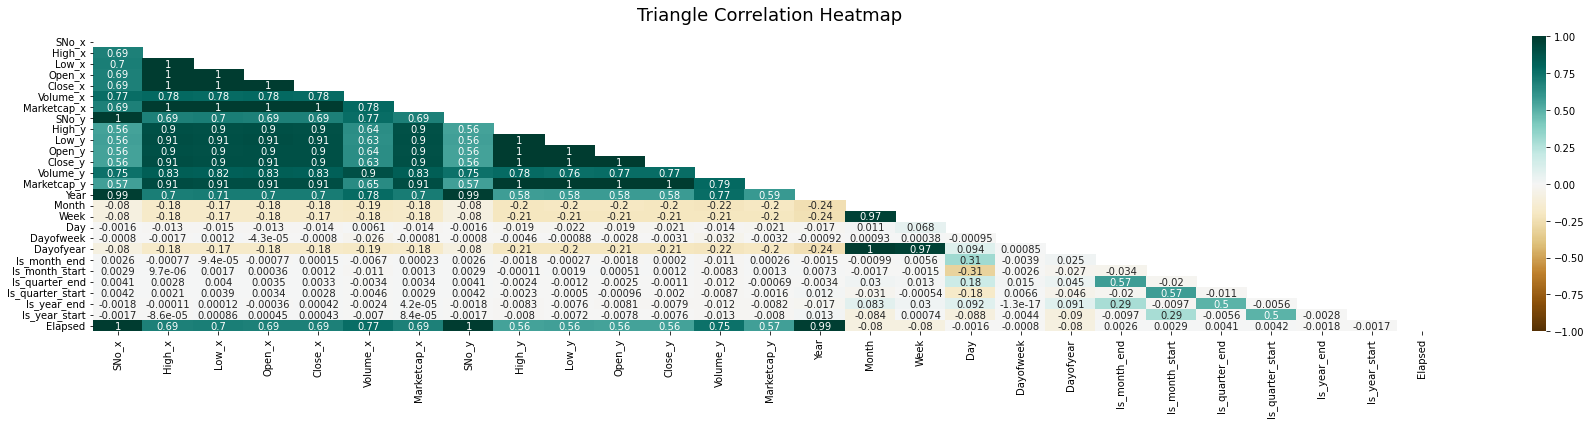

In [244]:
plt.figure(figsize=(25, 6))
mask = np.triu(np.ones_like(df_merged.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_merged.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);


In [245]:
df_merged.corr()[['Open_x']].sort_values(by='Open_x', ascending=False)

,Open_x
Open_x,1.00
High_x,1.00
Low_x,1.00
Close_x,1.00
Marketcap_x,1.00
Marketcap_y,0.91
Low_y,0.91
Close_y,0.91
Open_y,0.90
High_y,0.90


In [246]:
df_merged.columns

Index(['SNo_x', 'Name_x', 'Symbol_x', 'Date', 'High_x', 'Low_x', 'Open_x',
       'Close_x', 'Volume_x', 'Marketcap_x', 'SNo_y', 'Name_y', 'Symbol_y',
       'High_y', 'Low_y', 'Open_y', 'Close_y', 'Volume_y', 'Marketcap_y',
       'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'Elapsed'],
      dtype='object')

In [247]:
df_merged.drop("SNo_x", axis=1, inplace=True)
df_merged.drop("Name_x", axis=1, inplace=True)
df_merged.drop("Symbol_x", axis=1, inplace=True)
df_merged.drop("Date", axis=1, inplace=True)
df2=df_merged['Open_x']
df_merged.drop("Open_x", axis=1, inplace=True)
df_merged.drop("SNo_y", axis=1, inplace=True)
df_merged.drop("Name_y", axis=1, inplace=True)
df_merged.drop("Symbol_y", axis=1, inplace=True)
df_merged.drop("Elapsed", axis=1, inplace=True)

In [248]:
df_merged['Open'] = df2

In [249]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [250]:
X, y = df_merged.iloc[:,:-1],df_merged.iloc[:,-1]

In [251]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [252]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [253]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [254]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[20:53:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [255]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 5994.598065


In [256]:
#hyperparameter-tuning.:
from sklearn.model_selection import RandomizedSearchCV

In [257]:
X, y = df_merged.iloc[:,:-1],df_merged.iloc[:,-1]
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=15,
                         verbose=0)
clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

[20:53:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:53:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [258]:
#k-fold Cross Validation using XGBoost with best parameters obtained before.

In [265]:
params = {"objective":"reg:linear",'colsample_bytree': 0.70,'learning_rate': 0.2,
                'max_depth': 10, 'alpha': 10,'n_estimators':500,'colsample_bylevel':0.4,'subsample':0.60}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[20:56:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [266]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,"12,458.66",320.90,"12,453.35",667.74
1,"10,090.92",247.37,"10,100.32",588.71
2,"8,176.07",210.96,"8,196.55",484.77
3,"6,610.69",168.97,"6,631.17",419.09
4,"5,359.90",150.19,"5,386.70",346.76


In [267]:
print((cv_results["test-rmse-mean"]).tail(1))

49   619.07
Name: test-rmse-mean, dtype: float64


In [268]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


[20:56:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


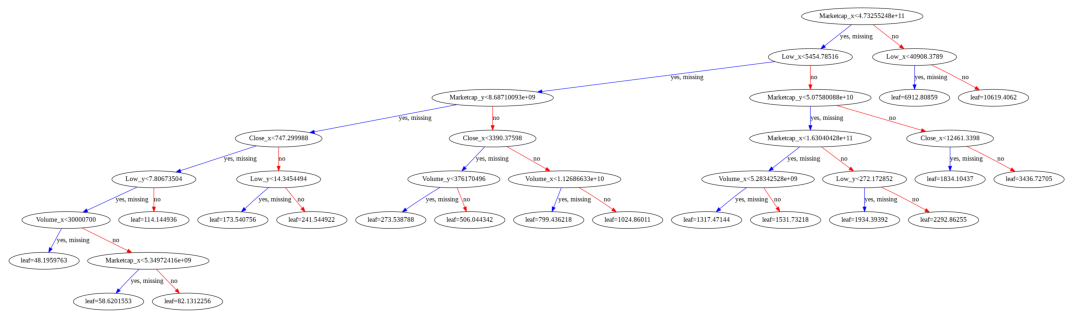

In [269]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [90, 10]
plt.show()

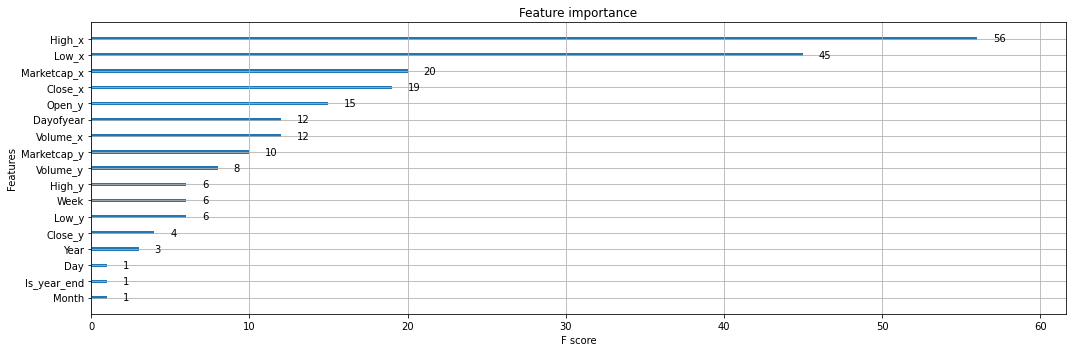

In [271]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 5] #feature selection;marketcap, dayofyear, year is the most important feature.
plt.show()

### Model Evaluation

Mean Square Error of kNN, Multiple Linear and Decision Tree Regression are as follows respectively: 941.5684089209653, 105.03471394589906, 264.5355910482711.
This means that Multiple Linear Regression has the least mean square error which makes it the best model.

### Recommadition System Whether to Buy or Sell Bitcoin

In [240]:
rec_df = pd.DataFrame({"Actuals" : y_test , "Predictions" : y_pred_dt})
rec_df = rec_df.reset_index()
rec_df.drop(columns = {'index'} , inplace = True)
rec_df

,Actuals,Predictions
0,"9,185.06","9,260.99"
1,423.93,428.70
2,"58,877.39","57,352.77"
3,"9,525.07","9,691.23"
4,462.23,454.52
...,...,...
427,"59,171.93","56,099.91"
428,"6,704.77","6,622.45"
429,768.08,774.75
430,"11,256.00","11,431.10"


In [241]:
rec_df["Recommendations"] = rec_df.apply(lambda x: 'Sell' if x['Actuals'] >
                     x['Predictions'] else 'Buy', axis=1)
rec_df

,Actuals,Predictions,Recommendations
0,"9,185.06","9,260.99",Buy
1,423.93,428.70,Buy
2,"58,877.39","57,352.77",Sell
3,"9,525.07","9,691.23",Buy
4,462.23,454.52,Sell
...,...,...,...
427,"59,171.93","56,099.91",Sell
428,"6,704.77","6,622.45",Sell
429,768.08,774.75,Buy
430,"11,256.00","11,431.10",Buy
